___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise*** 
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [1296]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

### Load Dataset

In [1297]:
df0 = pd.read_csv('marketing_campaign.csv', sep=';')

In [1298]:
df = df0.copy()
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [1299]:
from skimpy import clean_columns

df = clean_columns(df)
df.head(3)

id  year_birth   education marital_status  income  kidhome  teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   

  dt_customer  recency  mnt_wines  ...  num_web_visits_month  accepted_cmp_3  \
0  2012-09-04       58        635  ...                     7               0   
1  2014-03-08       38         11  ...                     5               0   
2  2013-08-21       26        426  ...                     4               0   

   accepted_cmp_4  accepted_cmp_5  accepted_cmp_1  accepted_cmp_2  complain  \
0               0               0               0               0         0   
1               0               0               0               0         0   
2               0               0               0               0         0   

   z_cost_contact  z_revenue  response  
0               3         11         1  
1               3         11         0  
2               3         11         0  

[3 rows x 29 columns]

In [1300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2240 non-null   int64  
 1   year_birth             2240 non-null   int64  
 2   education              2240 non-null   object 
 3   marital_status         2240 non-null   object 
 4   income                 2216 non-null   float64
 5   kidhome                2240 non-null   int64  
 6   teenhome               2240 non-null   int64  
 7   dt_customer            2240 non-null   object 
 8   recency                2240 non-null   int64  
 9   mnt_wines              2240 non-null   int64  
 10  mnt_fruits             2240 non-null   int64  
 11  mnt_meat_products      2240 non-null   int64  
 12  mnt_fish_products      2240 non-null   int64  
 13  mnt_sweet_products     2240 non-null   int64  
 14  mnt_gold_prods         2240 non-null   int64  
 15  num_

In [1301]:
df.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp_3            0
accepted_cmp_4            0
accepted_cmp_5            0
accepted_cmp_1            0
accepted_cmp_2            0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

In [1302]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2240   │ │ int32       │ 25    │                                                          │
│ │ Number of columns │ 29     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ id                    │   0 │     0 │      5592 │    3247 │    0 │  2828 │  5458 │  8428 │  11190 │ ▇▇▇▇▆▇ │  │
│ │ year_birth            │   0 │     0 │      1969 │   11.98 │ 1893 │  1959 │  1970 │  1977 │   1996 │    ▅▇▃ │  │
│ │ income                │  24 │  1.07 │     52250 │   25170 │ 1730 │ 35300 │ 51380 │ 68520 │ 666700 │   ▇    │  │
│ │ kidhome               │   0 │     0 │    0.4442 │  0.5384 │    0 │     0 │     0 │     1 │      2 │  ▇  ▆  │  │
│ │ teenhome              │   0 │     0 │    0.5062 │  0.5445 │    0 │     0 │     0 │     1 │      2 │  ▇  ▇  │  │
│ │ recency               │   0 │     0 │     49.11 │   28.96 │    0 │    24 │    49 │    74 │     99 │ ▇▇▇▇▇▇ │  │
│ │ mnt_wines             │   0 │     0 │     303.9 │   336.6 │    0 │ 23.75 │ 173.5 │ 504.2 │   1493 │ ▇▂▂▁▁  │  │
│ │ mnt_fruits            │   0 │     0 │      26.3 │   39.77 │    0 │     1 │     8 │    33 │    199 │  ▇▁▁   │  │
│ │ mnt_meat_products     │   0 │     0 │     166.9 │   225.7 │    0 │    16 │    67 │   232 │   1725 │  ▇▁▁   │  │
│ │ mnt_fish_products     │   0 │     0 │     37.53 │   54.63 │    0 │     3 │    12 │    50 │    259 │  ▇▁▁   │  │
│ │ mnt_sweet_products    │   0 │     0 │     27.06 │   41.28 │    0 │     1 │     8 │    33 │    263 │  ▇▁▁   │  │
│ │ mnt_gold_prods        │   0 │     0 │     44.02 │   52.17 │    0 │     9 │    24 │    56 │    362 │  ▇▁▁   │  │
│ │ num_deals_purchases   │   0 │     0 │     2.325 │   1.932 │    0 │     1 │     2 │     3 │     15 │  ▇▃▁   │  │
│ │ num_web_purchases     │   0 │     0 │     4.085 │   2.779 │    0 │     2 │     4 │     6 │     27 │  ▇▃▁   │  │
│ │ num_catalog_purchases │   0 │     0 │     2.662 │   2.923 │    0 │     0 │     2 │     4 │     28 │   ▇▂   │  │
│ │ num_store_purchases   │   0 │     0 │      5.79 │   3.251 │    0 │     3 │     5 │     8 │     13 │ ▂▇▃▃▂▃ │  │
│ │ num_web_visits_month  │   0 │     0 │     5.317 │   2.427 │    0 │     3 │     6 │     7 │     20 │  ▅▇▇   │  │
│ │ accepted_cmp_3        │   0 │     0 │   0.07277 │  0.2598 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ accepted_cmp_4        │   0 │     0 │   0.07455 │  0.2627 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ accepted_cmp_5        │   0 │     0 │   0.07277 │  0.2598 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ accepted_cmp_1        │   0 │     0 │   0.06429 │  0.2453 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ accepted_cmp_2        │   0 │     0 │   0.01339 │   

In [1303]:
df.nunique()

id                       2240
year_birth                 59
education                   5
marital_status              8
income                   1974
kidhome                     3
teenhome                    3
dt_customer               663
recency                   100
mnt_wines                 776
mnt_fruits                158
mnt_meat_products         558
mnt_fish_products         182
mnt_sweet_products        177
mnt_gold_prods            213
num_deals_purchases        15
num_web_purchases          15
num_catalog_purchases      14
num_store_purchases        14
num_web_visits_month       16
accepted_cmp_3              2
accepted_cmp_4              2
accepted_cmp_5              2
accepted_cmp_1              2
accepted_cmp_2              2
complain                    2
z_cost_contact              1
z_revenue                   1
response                    2
dtype: int64

In [1304]:
df.shape

(2240, 29)

In [1305]:
def first_looking(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    None.

    Prints:
    -------
    column name    : str
        The name of the column being analyzed.
    per_of_nulls   : float
        The percentage of null values in the column.
    num_of_nulls   : int
        The number of null values in the column.
    num_of_uniques : int
        The number of unique values in the column.
    shape_of_df    : tuple
        The shape of the DataFrame.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))

In [1306]:
df.describe().T

count      mean       std  min      25%       50%  \
id                      2240  5,592.16  3,246.66    0 2,828.25  5,458.50   
year_birth              2240  1,968.81     11.98 1893     1959      1970   
income                  2216 52,247.25 25,173.08 1730    35303 51,381.50   
kidhome                 2240      0.44      0.54    0        0         0   
teenhome                2240      0.51      0.54    0        0         0   
recency                 2240     49.11     28.96    0       24        49   
mnt_wines               2240    303.94    336.60    0    23.75    173.50   
mnt_fruits              2240     26.30     39.77    0        1         8   
mnt_meat_products       2240    166.95    225.72    0       16        67   
mnt_fish_products       2240     37.53     54.63    0        3        12   
mnt_sweet_products      2240     27.06     41.28    0        1         8   
mnt_gold_prods          2240     44.02     52.17    0        9        24   
num_deals_purchases     2240      2.33      1.93    0        1         2   
num_web_purchases       2240      4.08      2.78    0        2         4   
num_catalog_purchases   2240      2.66      2.92    0        0         2   
num_store_purchases     2240      5.79      3.25    0        3         5   
num_web_visits_month    2240      5.32      2.43    0        3         6   
accepted_cmp_3          2240      0.07      0.26    0        0         0   
accepted_cmp_4          2240      0.07      0.26    0        0         0   
accepted_cmp_5          2240      0.07      0.26    0        0         0   
accepted_cmp_1          2240      0.06      0.25    0        0         0   
accepted_cmp_2          2240      0.01      0.11    0        0         0   
complain                2240      0.01      0.10    0        0         0   
z_cost_contact          2240         3         0    3        3         3   
z_revenue               2240        11         0   11       11        11   
response                2240      0.15      0.36    0        0         0   

                           75%    max  
id                    8,427.75  11191  
year_birth                1977   1996  
income                   68522 666666  
kidhome                      1      2  
teenhome                     1      2  
recency                     74     99  
mnt_wines               504.25   1493  
mnt_fruits                  33    199  
mnt_meat_products          232   1725  
mnt_fish_products           50    259  
mnt_sweet_products          33    263  
mnt_gold_prods              56    362  
num_deals_purchases          3     15  
num_web_purchases            6     27  
num_catalog_purchases        4     28  
num_store_purchases          8     13  
num_web_visits_month         7     20  
accepted_cmp_3               0      1  
accepted_cmp_4               0      1  
accepted_cmp_5               0      1  
accepted_cmp_1               0      1  
accepted_cmp_2               0      1  
complain                     0      1  
z_cost_contact               3      3  
z_revenue                   11     11  
response                     0      1

In [1307]:
target = df.response
target

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: response, Length: 2240, dtype: int64

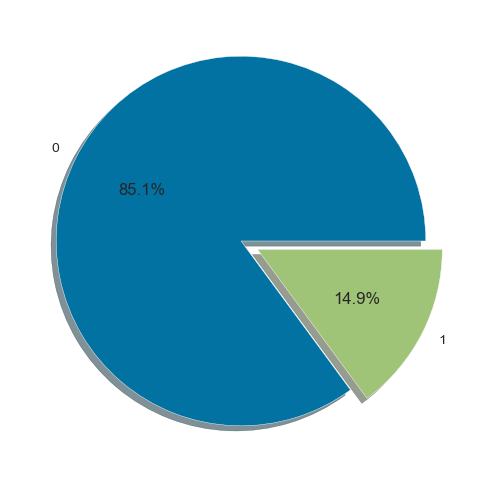

In [1308]:
df["response"].value_counts().plot(kind="pie", autopct="%1.1f%%", explode=(0, 0.1), shadow=True, figsize=(6,6))
plt.ylabel("");

In [1309]:
df.drop(columns = 'response', axis = 1, inplace = True)

In [1310]:
df.head().T

0           1           2           3  \
id                           5524        2174        4141        6182   
year_birth                   1957        1954        1965        1984   
education              Graduation  Graduation  Graduation  Graduation   
marital_status             Single      Single    Together    Together   
income                      58138       46344       71613       26646   
kidhome                         0           1           0           1   
teenhome                        0           1           0           0   
dt_customer            2012-09-04  2014-03-08  2013-08-21  2014-02-10   
recency                        58          38          26          26   
mnt_wines                     635          11         426          11   
mnt_fruits                     88           1          49           4   
mnt_meat_products             546           6         127          20   
mnt_fish_products             172           2         111          10   
mnt_sweet_products             88           1          21           3   
mnt_gold_prods                 88           6          42           5   
num_deals_purchases             3           2           1           2   
num_web_purchases               8           1           8           2   
num_catalog_purchases          10           1           2           0   
num_store_purchases             4           2          10           4   
num_web_visits_month            7           5           4           6   
accepted_cmp_3                  0           0           0           0   
accepted_cmp_4                  0           0           0           0   
accepted_cmp_5                  0           0           0           0   
accepted_cmp_1                  0           0           0           0   
accepted_cmp_2                  0           0           0           0   
complain                        0           0           0           0   
z_cost_contact                  3           3           3           3   
z_revenue                      11          11          11          11   

                                4  
id                           5324  
year_birth                   1981  
education                     PhD  
marital_status            Married  
income                      58293  
kidhome                         1  
teenhome                        0  
dt_customer            2014-01-19  
recency                        94  
mnt_wines                     173  
mnt_fruits                     43  
mnt_meat_products             118  
mnt_fish_products              46  
mnt_sweet_products             27  
mnt_gold_prods                 15  
num_deals_purchases             5  
num_web_purchases               5  
num_catalog_purchases           3  
num_store_purchases             6  
num_web_visits_month            5  
accepted_cmp_3                  0  
accepted_cmp_4                  0  
accepted_cmp_5                  0  
accepted_cmp_1                  0  
accepted_cmp_2                  0  
complain                        0  
z_cost_contact                  3  
z_revenue                      11

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

In [1311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2240 non-null   int64  
 1   year_birth             2240 non-null   int64  
 2   education              2240 non-null   object 
 3   marital_status         2240 non-null   object 
 4   income                 2216 non-null   float64
 5   kidhome                2240 non-null   int64  
 6   teenhome               2240 non-null   int64  
 7   dt_customer            2240 non-null   object 
 8   recency                2240 non-null   int64  
 9   mnt_wines              2240 non-null   int64  
 10  mnt_fruits             2240 non-null   int64  
 11  mnt_meat_products      2240 non-null   int64  
 12  mnt_fish_products      2240 non-null   int64  
 13  mnt_sweet_products     2240 non-null   int64  
 14  mnt_gold_prods         2240 non-null   int64  
 15  num_

In [1312]:
df.duplicated().sum().any()

False

# id 

In [1313]:
first_looking(df, 'id')

column name    :  id
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2240
shape_of_df    :  (2240, 28)
--------------------------------
id
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: count, Length: 2240, dtype: int64


In [1314]:
df.id.unique()

array([5524, 2174, 4141, ..., 7270, 8235, 9405], dtype=int64)

In [1315]:
df.drop(columns = 'id', axis = 1, inplace = True)

# year_birth  

In [1316]:
df.dt_customer.max()

'2014-06-29'

In [1317]:
first_looking(df, 'year_birth')

column name    :  year_birth
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  59
shape_of_df    :  (2240, 27)
--------------------------------
year_birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64


In [1318]:
df['age'] = 2014 - df.year_birth

In [1319]:
df.age

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: age, Length: 2240, dtype: int64

In [1320]:
df = df.drop(columns = 'year_birth')

In [1321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   education              2240 non-null   object 
 1   marital_status         2240 non-null   object 
 2   income                 2216 non-null   float64
 3   kidhome                2240 non-null   int64  
 4   teenhome               2240 non-null   int64  
 5   dt_customer            2240 non-null   object 
 6   recency                2240 non-null   int64  
 7   mnt_wines              2240 non-null   int64  
 8   mnt_fruits             2240 non-null   int64  
 9   mnt_meat_products      2240 non-null   int64  
 10  mnt_fish_products      2240 non-null   int64  
 11  mnt_sweet_products     2240 non-null   int64  
 12  mnt_gold_prods         2240 non-null   int64  
 13  num_deals_purchases    2240 non-null   int64  
 14  num_web_purchases      2240 non-null   int64  
 15  num_

In [1322]:
df.age.value_counts()

age
38     89
43     87
39     83
42     79
36     77
44     77
41     74
49     74
45     71
40     69
58     55
56     53
35     53
62     52
37     52
46     51
55     51
48     50
60     50
59     49
54     49
32     45
51     45
47     44
52     44
57     43
63     43
31     42
28     42
50     42
34     39
33     39
30     38
53     36
61     35
29     32
25     30
65     30
64     29
26     29
27     27
66     21
24     18
68     16
67     16
23     15
22     13
69      8
71      7
70      7
21      5
19      5
20      3
18      2
115     1
73      1
121     1
114     1
74      1
Name: count, dtype: int64

In [1323]:
df.age.unique()

array([ 57,  60,  49,  30,  33,  47,  43,  29,  40,  64,  31,  38,  55,
        62,  27,  68,  34,  65,  32,  35,  63,  45,  28,  25,  51,  44,
        41,  71,  39,  18,  46,  50,  37,  36,  59,  48,  26,  66,  56,
        42,  54,  69,  23,  52,  61,  53,  58,  22, 114, 121,  24,  67,
       115,  21,  20,  73,  70,  19,  74], dtype=int64)

In [1324]:
df = df[df.age <= 90]

In [1325]:
df.age.unique()

array([57, 60, 49, 30, 33, 47, 43, 29, 40, 64, 31, 38, 55, 62, 27, 68, 34,
       65, 32, 35, 63, 45, 28, 25, 51, 44, 41, 71, 39, 18, 46, 50, 37, 36,
       59, 48, 26, 66, 56, 42, 54, 69, 23, 52, 61, 53, 58, 22, 24, 67, 21,
       20, 73, 70, 19, 74], dtype=int64)

In [1326]:
df.age.value_counts()

age
38    89
43    87
39    83
42    79
36    77
44    77
49    74
41    74
45    71
40    69
58    55
56    53
35    53
62    52
37    52
46    51
55    51
48    50
60    50
59    49
54    49
32    45
51    45
47    44
52    44
57    43
63    43
31    42
28    42
50    42
34    39
33    39
30    38
53    36
61    35
29    32
25    30
65    30
64    29
26    29
27    27
66    21
24    18
68    16
67    16
23    15
22    13
69     8
71     7
70     7
21     5
19     5
20     3
18     2
73     1
74     1
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

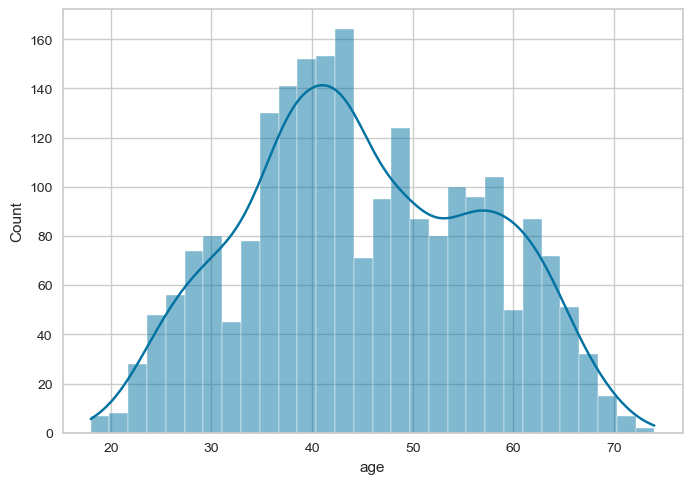

In [1327]:
sns.histplot(df, x = 'age', kde = True, bins = 30)

In [1328]:
df.groupby(['marital_status', 'education'])['age'].mean()

marital_status  education 
Absurd          Graduation      21
                Master          57
Alone           Graduation      26
                Master          56
                PhD             41
Divorced        2n Cycle     46.59
                Basic           38
                Graduation   46.95
                Master       46.70
                PhD          49.62
Married         2n Cycle     40.85
                Basic        35.75
                Graduation   43.66
                Master       46.82
                PhD          46.81
Single          2n Cycle     38.11
                Basic        31.11
                Graduation   42.06
                Master       43.28
                PhD          45.99
Together        2n Cycle     40.47
                Basic        43.29
                Graduation   45.65
                Master       48.61
                PhD          48.19
Widow           2n Cycle     54.60
                Basic           54
                Graduation  

# education

In [1329]:
first_looking(df, 'education')

column name    :  education
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
shape_of_df    :  (2237, 27)
--------------------------------
education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64


https://eurydice.eacea.ec.europa.eu/national-education-systems/germany/second-cycle-programmes

In [1330]:
#Segmenting education levels in three groups
df["education"]=df["education"].replace({"Basic":"lower_edu_level", "Graduation":"lower_edu_level","2n Cycle":"medium_edu_level", "Master":"medium_edu_level", "PhD":"high_edu_level"})

In [1331]:
df.education.value_counts()

education
lower_edu_level     1181
medium_edu_level     571
high_edu_level       485
Name: count, dtype: int64

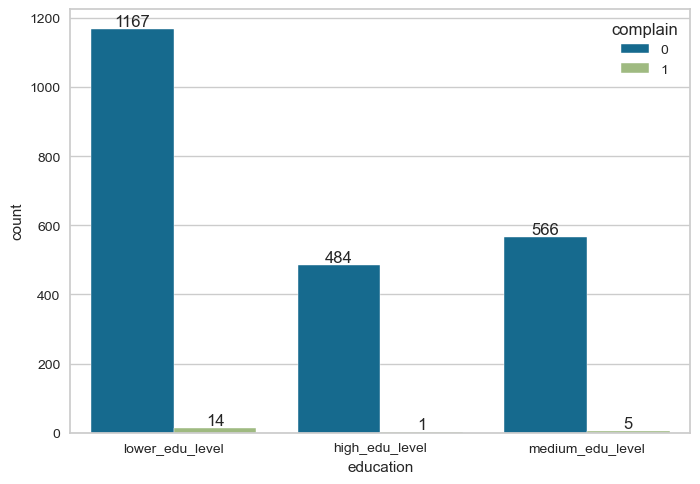

In [1332]:
ax = sns.countplot(data=df, x="education", hue="complain")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

# marital_status

In [1333]:
first_looking(df, 'marital_status')

column name    :  marital_status
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  8
shape_of_df    :  (2237, 27)
--------------------------------
marital_status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [1334]:
df[df["marital_status"]=="Absurd"].T

2093              2134
education              lower_edu_level  medium_edu_level
marital_status                  Absurd            Absurd
income                           79244             65487
kidhome                              0                 0
teenhome                             0                 0
dt_customer                 2012-12-19        2014-01-10
recency                             58                48
mnt_wines                          471               240
mnt_fruits                         102                67
mnt_meat_products                  125               500
mnt_fish_products                  212               199
mnt_sweet_products                  61                 0
mnt_gold_prods                     245               163
num_deals_purchases                  1                 3
num_web_purchases                    4                 3
num_catalog_purchases               10                 5
num_store_purchases                  7                 6
num_web_visits_month                 1                 2
accepted_cmp_3                       0                 0
accepted_cmp_4                       0                 0
accepted_cmp_5                       1                 0
accepted_cmp_1                       1                 0
accepted_cmp_2                       0                 0
complain                             0                 0
z_cost_contact                       3                 3
z_revenue                           11                11
age                                 21                57

In [1335]:
df[df["marital_status"]=="YOLO"].T

2177            2202
education              high_edu_level  high_edu_level
marital_status                   YOLO            YOLO
income                          48432           48432
kidhome                             0               0
teenhome                            1               1
dt_customer                2012-10-18      2012-10-18
recency                             3               3
mnt_wines                         322             322
mnt_fruits                          3               3
mnt_meat_products                  50              50
mnt_fish_products                   4               4
mnt_sweet_products                  3               3
mnt_gold_prods                     42              42
num_deals_purchases                 5               5
num_web_purchases                   7               7
num_catalog_purchases               1               1
num_store_purchases                 6               6
num_web_visits_month                8               8
accepted_cmp_3                      0               0
accepted_cmp_4                      0               0
accepted_cmp_5                      0               0
accepted_cmp_1                      0               0
accepted_cmp_2                      0               0
complain                            0               0
z_cost_contact                      3               3
z_revenue                          11              11
age                                41              41

In [1336]:
df[df["marital_status"]=="Alone"].T

131             138              153
education              medium_edu_level  high_edu_level  lower_edu_level
marital_status                    Alone           Alone            Alone
income                            61331           35860            34176
kidhome                               1               1                1
teenhome                              1               1                0
dt_customer                  2013-03-10      2014-05-19       2014-05-12
recency                              42              37               12
mnt_wines                           534              15                5
mnt_fruits                            5               0                7
mnt_meat_products                    47               8               24
mnt_fish_products                     0               4               19
mnt_sweet_products                    5               2               14
mnt_gold_prods                       41              20               20
num_deals_purchases                   5               2                4
num_web_purchases                    11               1                3
num_catalog_purchases                 1               1                0
num_store_purchases                   6               2                4
num_web_visits_month                  8               5                6
accepted_cmp_3                        0               1                0
accepted_cmp_4                        0               0                0
accepted_cmp_5                        0               0                0
accepted_cmp_1                        0               0                0
accepted_cmp_2                        0               0                0
complain                              0               0                0
z_cost_contact                        3               3                3
z_revenue                            11              11               11
age                                  56              41               26

In [1337]:
df['marital_status'] = df['marital_status'].replace({'Divorced' :'Single', 'Widow': 'Single', 'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})

In [1338]:
df.marital_status = df.marital_status.replace({'Together' : 'Relationship', 'Married' : 'Relationship'})

In [1339]:
df.marital_status.value_counts()

marital_status
Relationship    1443
Single           794
Name: count, dtype: int64

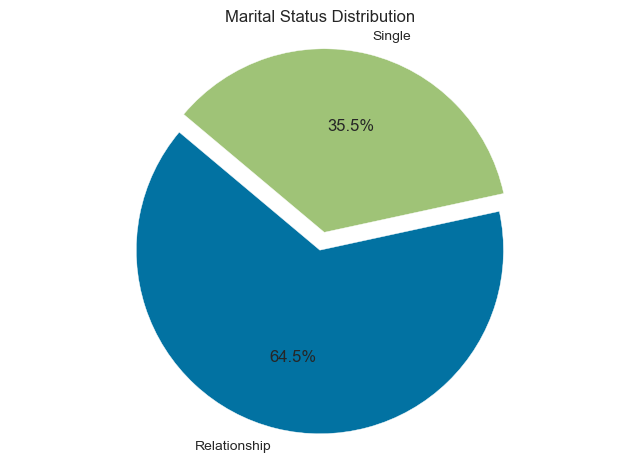

In [1340]:

# Count the occurrences of each marital status
marital_counts = df['marital_status'].value_counts()

# Values and labels for the pie chart
values = marital_counts.values
labels = marital_counts.index

# Explode parameter to separate the slices
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]  # Adjust according to the number of slices

# Create the pie chart
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Marital Status Distribution')
plt.show()

# income 

In [1341]:
first_looking(df, 'income')

column name    :  income
--------------------------------
per_of_nulls   :  % 1.07
num_of_nulls   :  24
num_of_uniques :  1972
shape_of_df    :  (2237, 27)
--------------------------------
income
NaN      24
7500     12
35860     4
18690     3
46098     3
         ..
51124     1
74250     1
40760     1
41452     1
52869     1
Name: count, Length: 1972, dtype: int64


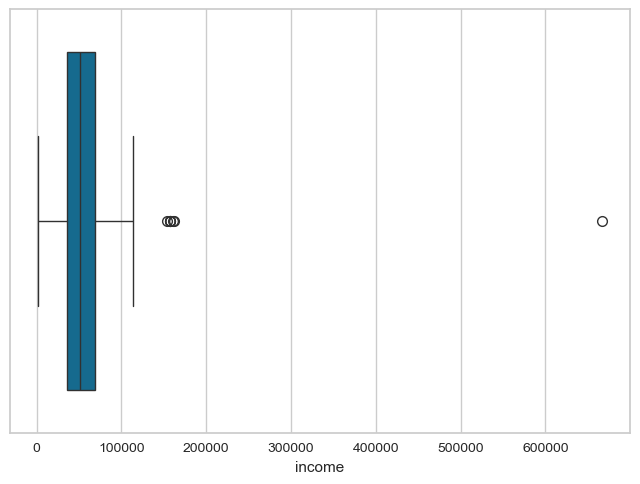

In [1342]:
sns.boxplot(df, x = 'income');

In [1343]:
df.income.value_counts()

income
7500     12
35860     4
67445     3
34176     3
80134     3
         ..
51124     1
74250     1
40760     1
41452     1
52869     1
Name: count, Length: 1971, dtype: int64

In [1344]:
df[df['income'] > 200000]

education marital_status  income  kidhome  teenhome dt_customer  \
2233  lower_edu_level   Relationship  666666        1         0  2013-06-02   

      recency  mnt_wines  mnt_fruits  mnt_meat_products  ...  \
2233       23          9          14                 18  ...   

      num_web_visits_month  accepted_cmp_3  accepted_cmp_4  accepted_cmp_5  \
2233                     6               0               0               0   

      accepted_cmp_1  accepted_cmp_2  complain  z_cost_contact  z_revenue  age  
2233               0               0         0               3         11   37  

[1 rows x 27 columns]

In [1345]:
df[df['income'] > 150000]['income'].value_counts()

income
157243    1
162397    1
153924    1
160803    1
157733    1
157146    1
156924    1
666666    1
Name: count, dtype: int64

In [1346]:
df = df[df['income'] <= 150000]

In [1347]:
df.income.isnull().sum()

0

In [1348]:
first_looking(df, 'income')

column name    :  income
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1963
shape_of_df    :  (2205, 27)
--------------------------------
income
7500     12
35860     4
83844     3
46098     3
48432     3
         ..
72258     1
51124     1
74250     1
40760     1
52869     1
Name: count, Length: 1963, dtype: int64


In [1349]:
df.income.isnull().sum()

0

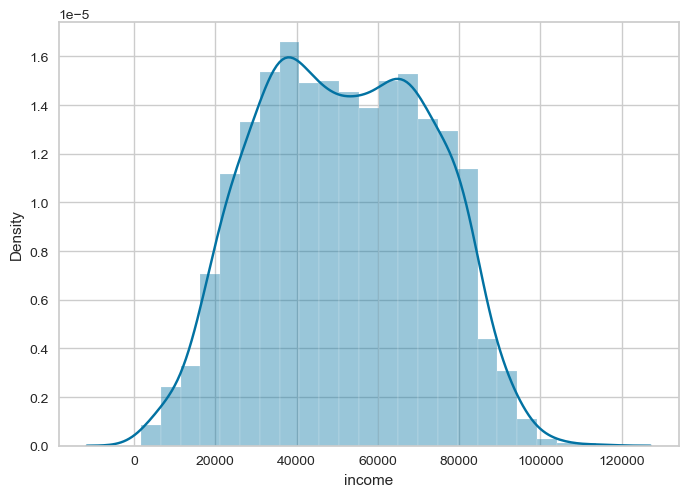

In [1350]:
sns.distplot(df["income"]);

# kidhome

In [1351]:
first_looking(df, "kidhome")

column name    :  kidhome
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
shape_of_df    :  (2205, 27)
--------------------------------
kidhome
0    1276
1     883
2      46
Name: count, dtype: int64


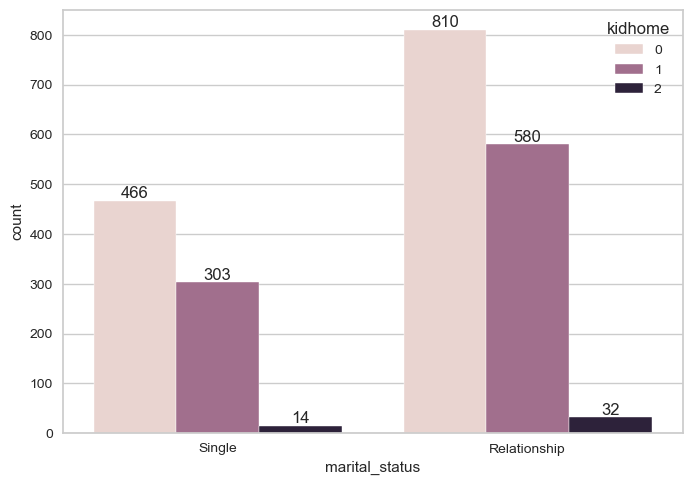

In [1352]:
ax = sns.countplot(data=df, x="marital_status", hue="kidhome")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

# teenhome

In [1353]:
first_looking(df, 'teenhome')

column name    :  teenhome
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
shape_of_df    :  (2205, 27)
--------------------------------
teenhome
0    1139
1    1015
2      51
Name: count, dtype: int64


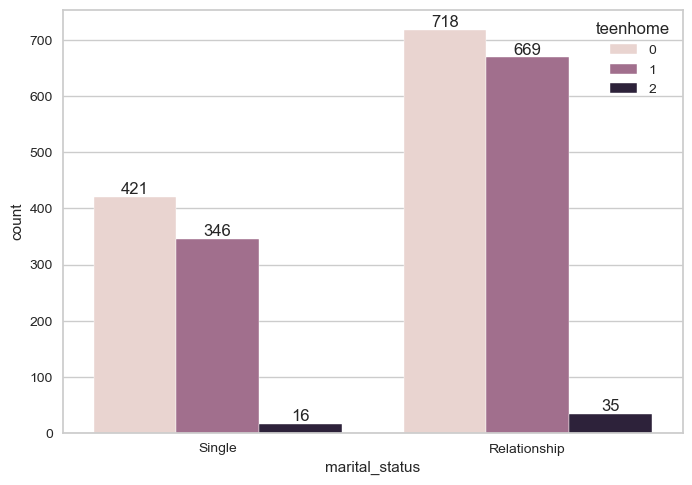

In [1354]:
ax = sns.countplot(data=df, x="marital_status", hue="teenhome")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

# dt_customer

In [1355]:
first_looking(df, 'dt_customer')

column name    :  dt_customer
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  662
shape_of_df    :  (2205, 27)
--------------------------------
dt_customer
2012-08-31    12
2012-09-12    11
2014-05-12    11
2013-02-14    11
2014-05-22    10
              ..
2013-01-24     1
2013-07-20     1
2014-02-03     1
2013-11-09     1
2014-01-09     1
Name: count, Length: 662, dtype: int64


In [1356]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

In [1357]:
current_date = pd.to_datetime('2014-12-31')

In [1358]:
df['days_registration'] = (current_date - df['dt_customer']).dt.days

In [1359]:
df.days_registration

0       848
1       298
2       497
3       324
4       346
       ... 
2235    566
2236    204
2237    340
2238    341
2239    807
Name: days_registration, Length: 2205, dtype: int64

In [1360]:
df = df.drop(columns= 'dt_customer', axis = 1)

In [1361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   education              2205 non-null   object 
 1   marital_status         2205 non-null   object 
 2   income                 2205 non-null   float64
 3   kidhome                2205 non-null   int64  
 4   teenhome               2205 non-null   int64  
 5   recency                2205 non-null   int64  
 6   mnt_wines              2205 non-null   int64  
 7   mnt_fruits             2205 non-null   int64  
 8   mnt_meat_products      2205 non-null   int64  
 9   mnt_fish_products      2205 non-null   int64  
 10  mnt_sweet_products     2205 non-null   int64  
 11  mnt_gold_prods         2205 non-null   int64  
 12  num_deals_purchases    2205 non-null   int64  
 13  num_web_purchases      2205 non-null   int64  
 14  num_catalog_purchases  2205 non-null   int64  
 15  num_store

# recency

In [1362]:
first_looking(df, 'recency')

column name    :  recency
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  100
shape_of_df    :  (2205, 27)
--------------------------------
recency
56    37
30    32
54    32
46    31
65    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: count, Length: 100, dtype: int64


# complain

In [1363]:
first_looking(df, "complain")

column name    :  complain
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
shape_of_df    :  (2205, 27)
--------------------------------
complain
0    2185
1      20
Name: count, dtype: int64


In [1364]:
df = df.drop(columns = 'complain', axis = 1)

# z_cost_contact

In [1365]:
first_looking(df, 'z_cost_contact')

column name    :  z_cost_contact
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1
shape_of_df    :  (2205, 26)
--------------------------------
z_cost_contact
3    2205
Name: count, dtype: int64


In [1366]:
df = df.drop(columns = 'z_cost_contact', axis = 1)

# z_revenue              

In [1367]:
first_looking(df, 'z_revenue')

column name    :  z_revenue
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1
shape_of_df    :  (2205, 25)
--------------------------------
z_revenue
11    2205
Name: count, dtype: int64


In [1368]:
df = df.drop(columns = 'z_revenue', axis = 1)

In [1369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   education              2205 non-null   object 
 1   marital_status         2205 non-null   object 
 2   income                 2205 non-null   float64
 3   kidhome                2205 non-null   int64  
 4   teenhome               2205 non-null   int64  
 5   recency                2205 non-null   int64  
 6   mnt_wines              2205 non-null   int64  
 7   mnt_fruits             2205 non-null   int64  
 8   mnt_meat_products      2205 non-null   int64  
 9   mnt_fish_products      2205 non-null   int64  
 10  mnt_sweet_products     2205 non-null   int64  
 11  mnt_gold_prods         2205 non-null   int64  
 12  num_deals_purchases    2205 non-null   int64  
 13  num_web_purchases      2205 non-null   int64  
 14  num_catalog_purchases  2205 non-null   int64  
 15  num_store

# spent

In [1370]:
df['spent'] = df['mnt_wines'] + df['mnt_fruits'] + df['mnt_meat_products'] + df['mnt_fish_products'] + df['mnt_sweet_products'] + df['mnt_gold_prods']

In [1371]:
first_looking(df, 'spent')

column name    :  spent
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1045
shape_of_df    :  (2205, 25)
--------------------------------
spent
46      18
22      17
57      16
55      15
44      15
        ..
108      1
1493     1
936      1
528      1
843      1
Name: count, Length: 1045, dtype: int64


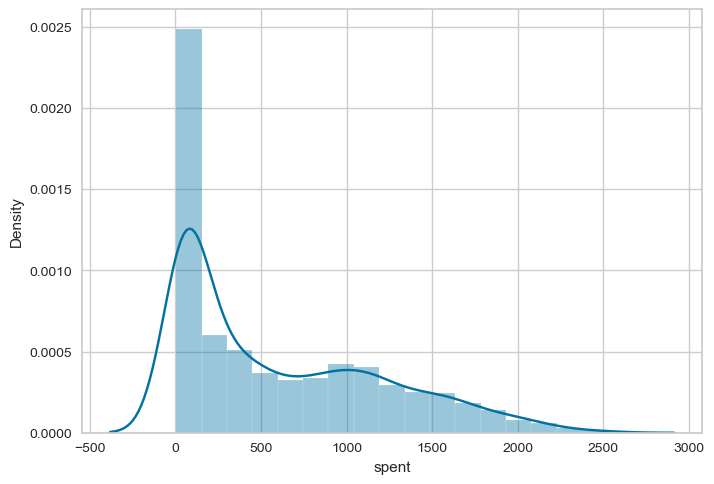

In [1372]:
sns.distplot(df.spent);

In [1373]:
df.describe().T

count      mean       std  min   25%   50%   75%    max
income                  2205 51,622.09 20,713.06 1730 35196 51287 68281 113734
kidhome                 2205      0.44      0.54    0     0     0     1      2
teenhome                2205      0.51      0.54    0     0     0     1      2
recency                 2205     49.01     28.93    0    24    49    74     99
mnt_wines               2205    306.16    337.49    0    24   178   507   1493
mnt_fruits              2205     26.40     39.78    0     2     8    33    199
mnt_meat_products       2205    165.31    217.78    0    16    68   232   1725
mnt_fish_products       2205     37.76     54.82    0     3    12    50    259
mnt_sweet_products      2205     27.13     41.13    0     1     8    34    262
mnt_gold_prods          2205     44.06     51.74    0     9    25    56    321
num_deals_purchases     2205      2.32      1.89    0     1     2     3     15
num_web_purchases       2205      4.10      2.74    0     2     4     6     27
num_catalog_purchases   2205      2.65      2.80    0     0     2     4     28
num_store_purchases     2205      5.82      3.24    0     3     5     8     13
num_web_visits_month    2205      5.34      2.41    0     3     6     7     20
accepted_cmp_3          2205      0.07      0.26    0     0     0     0      1
accepted_cmp_4          2205      0.07      0.26    0     0     0     0      1
accepted_cmp_5          2205      0.07      0.26    0     0     0     0      1
accepted_cmp_1          2205      0.06      0.25    0     0     0     0      1
accepted_cmp_2          2205      0.01      0.12    0     0     0     0      1
age                     2205     45.10     11.71   18    37    44    55     74
days_registration       2205    538.72    202.56  185   365   541   714    884
spent                   2205    606.82    601.68    5    69   397  1047   2525

# children

In [1374]:
df['children'] = df.kidhome + df.teenhome

In [1375]:
df.children.value_counts()

children
1    1112
0     628
2     415
3      50
Name: count, dtype: int64

In [1376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   education              2205 non-null   object 
 1   marital_status         2205 non-null   object 
 2   income                 2205 non-null   float64
 3   kidhome                2205 non-null   int64  
 4   teenhome               2205 non-null   int64  
 5   recency                2205 non-null   int64  
 6   mnt_wines              2205 non-null   int64  
 7   mnt_fruits             2205 non-null   int64  
 8   mnt_meat_products      2205 non-null   int64  
 9   mnt_fish_products      2205 non-null   int64  
 10  mnt_sweet_products     2205 non-null   int64  
 11  mnt_gold_prods         2205 non-null   int64  
 12  num_deals_purchases    2205 non-null   int64  
 13  num_web_purchases      2205 non-null   int64  
 14  num_catalog_purchases  2205 non-null   int64  
 15  num_store

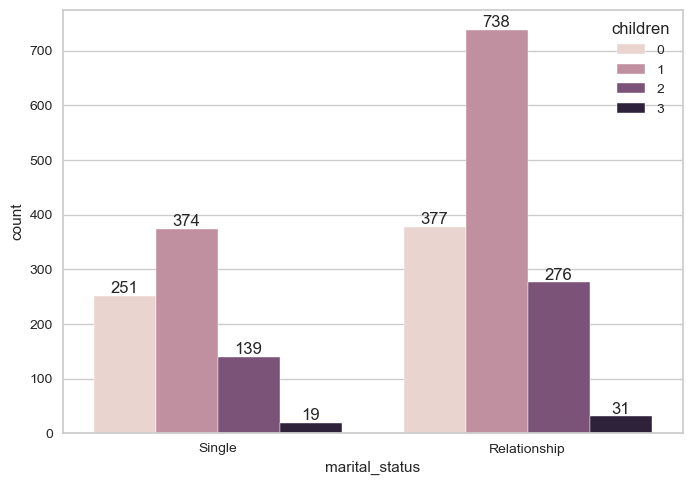

In [1377]:
ax = sns.countplot(data=df, x="marital_status", hue="children")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

In [1378]:
df = df.reset_index(drop=True)

# total_accepted

In [1379]:
df['total_accepted'] = df['accepted_cmp_1'] + df['accepted_cmp_2'] + df['accepted_cmp_3'] + df['accepted_cmp_4'] + df['accepted_cmp_5']

In [1380]:
first_looking(df, 'total_accepted')

column name    :  total_accepted
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
shape_of_df    :  (2205, 27)
--------------------------------
total_accepted
0    1747
1     322
2      81
3      44
4      11
Name: count, dtype: int64


In [1381]:
df = df.drop(columns = ['accepted_cmp_1', 'accepted_cmp_2', 'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5'], axis = 1)

In [1382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   education              2205 non-null   object 
 1   marital_status         2205 non-null   object 
 2   income                 2205 non-null   float64
 3   kidhome                2205 non-null   int64  
 4   teenhome               2205 non-null   int64  
 5   recency                2205 non-null   int64  
 6   mnt_wines              2205 non-null   int64  
 7   mnt_fruits             2205 non-null   int64  
 8   mnt_meat_products      2205 non-null   int64  
 9   mnt_fish_products      2205 non-null   int64  
 10  mnt_sweet_products     2205 non-null   int64  
 11  mnt_gold_prods         2205 non-null   int64  
 12  num_deals_purchases    2205 non-null   int64  
 13  num_web_purchases      2205 non-null   int64  
 14  num_catalog_purchases  2205 non-null   int64  
 15  num_

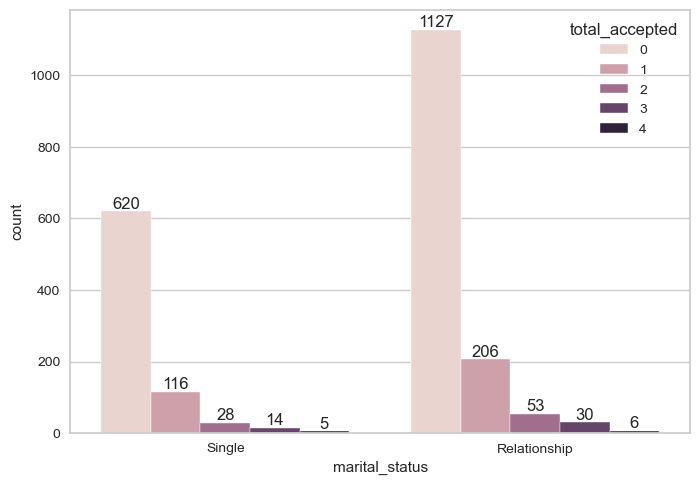

In [1383]:
ax = sns.countplot(data=df, x="marital_status", hue="total_accepted")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

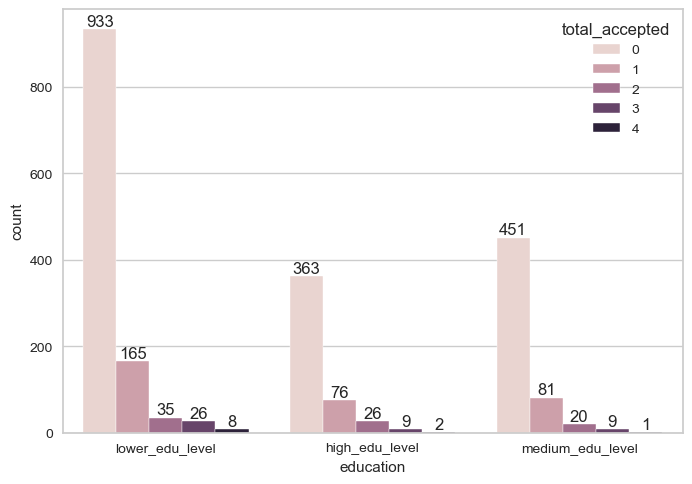

In [1384]:
ax = sns.countplot(data=df, x="education", hue="total_accepted")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

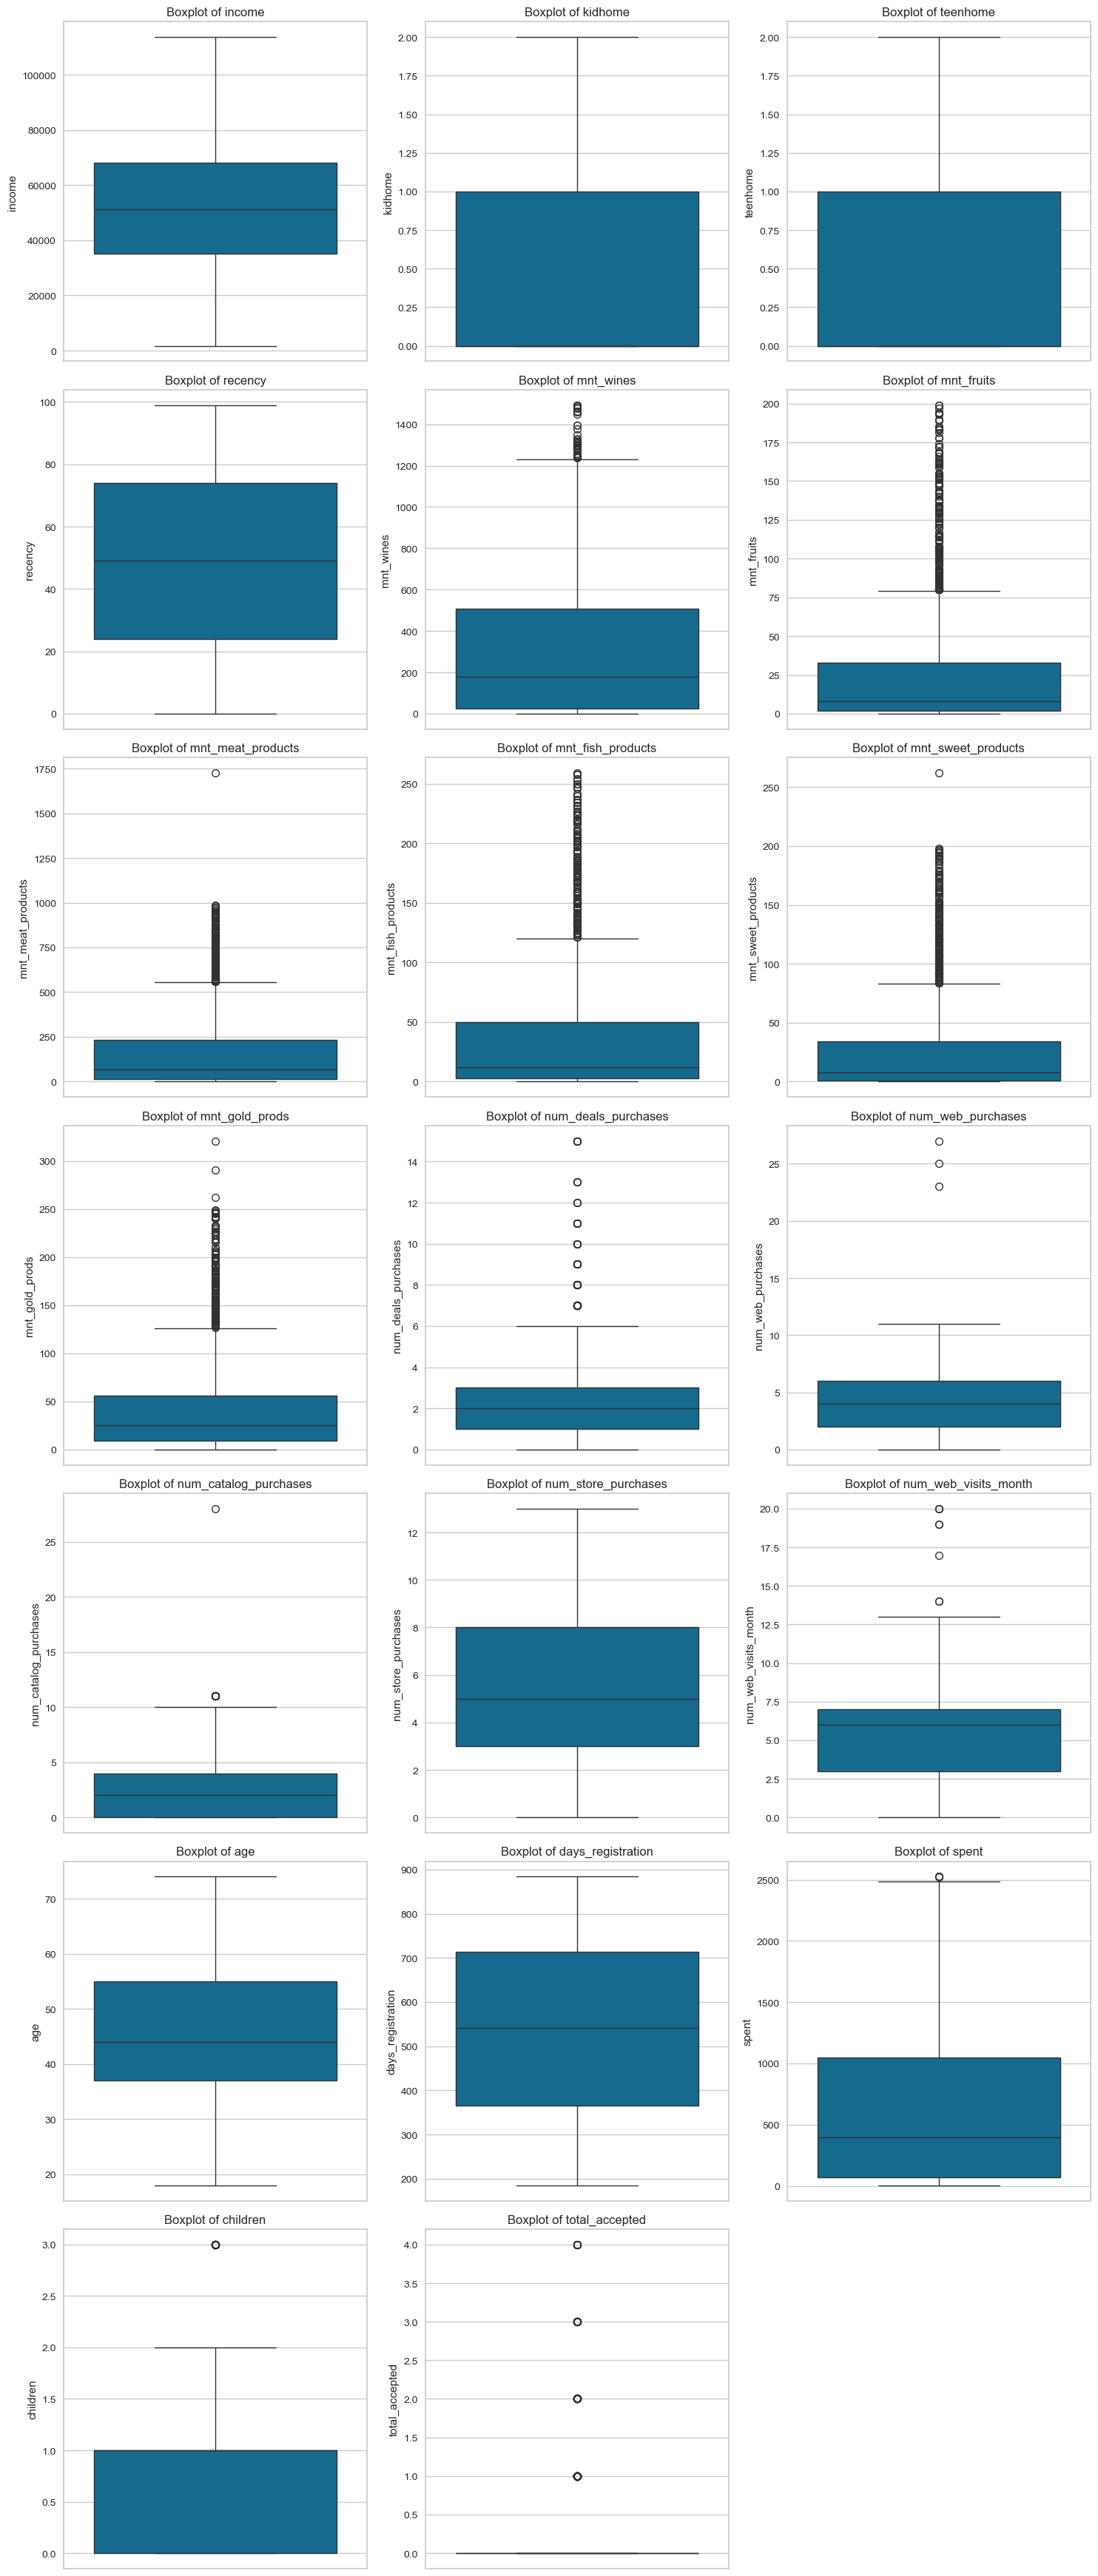

In [1385]:
# Plotting box plots for all numeric columns in a 3-column layout
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [1386]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'age', 'days_registration', 'spent', 'children', 'total_accepted'],
      dtype='object')

In [1387]:
cat_features = df.select_dtypes(include=['object'])
cat_features.columns

Index(['education', 'marital_status'], dtype='object')

### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted. 

In [1388]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [1389]:
scaler = StandardScaler()

In [1390]:
scaled_numerical_features = scaler.fit_transform(numerical_features)

In [1391]:
numerical_df = pd.DataFrame(scaled_numerical_features, columns =numerical_features.columns )
numerical_df.head()

income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0    0.31    -0.82     -0.93     0.31       0.97        1.55   
1   -0.25     1.04      0.91    -0.38      -0.87       -0.64   
2    0.97    -0.82     -0.93    -0.80       0.36        0.57   
3   -1.21     1.04     -0.93    -0.80      -0.87       -0.56   
4    0.32     1.04     -0.93     1.56      -0.39        0.42   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0               1.75               2.45                1.48            0.85   
1              -0.73              -0.65               -0.64           -0.74   
2              -0.18               1.34               -0.15           -0.04   
3              -0.67              -0.51               -0.59           -0.76   
4              -0.22               0.15               -0.00           -0.56   

   num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                 0.36               1.42                   2.63   
1                -0.17              -1.13                  -0.59   
2                -0.70               1.42                  -0.23   
3                -0.17              -0.77                  -0.95   
4                 1.42               0.33                   0.13   

   num_store_purchases  num_web_visits_month   age  days_registration  spent  \
0                -0.56                  0.69  1.02               1.53   1.68   
1                -1.18                 -0.14  1.27              -1.19  -0.96   
2                 1.29                 -0.55  0.33              -0.21   0.28   
3                -0.56                  0.27 -1.29              -1.06  -0.92   
4                 0.05                 -0.14 -1.03              -0.95  -0.31   

   children  total_accepted  
0     -1.27           -0.44  
1      1.40           -0.44  
2     -1.27           -0.44  
3      0.07           -0.44  
4      0.07           -0.44

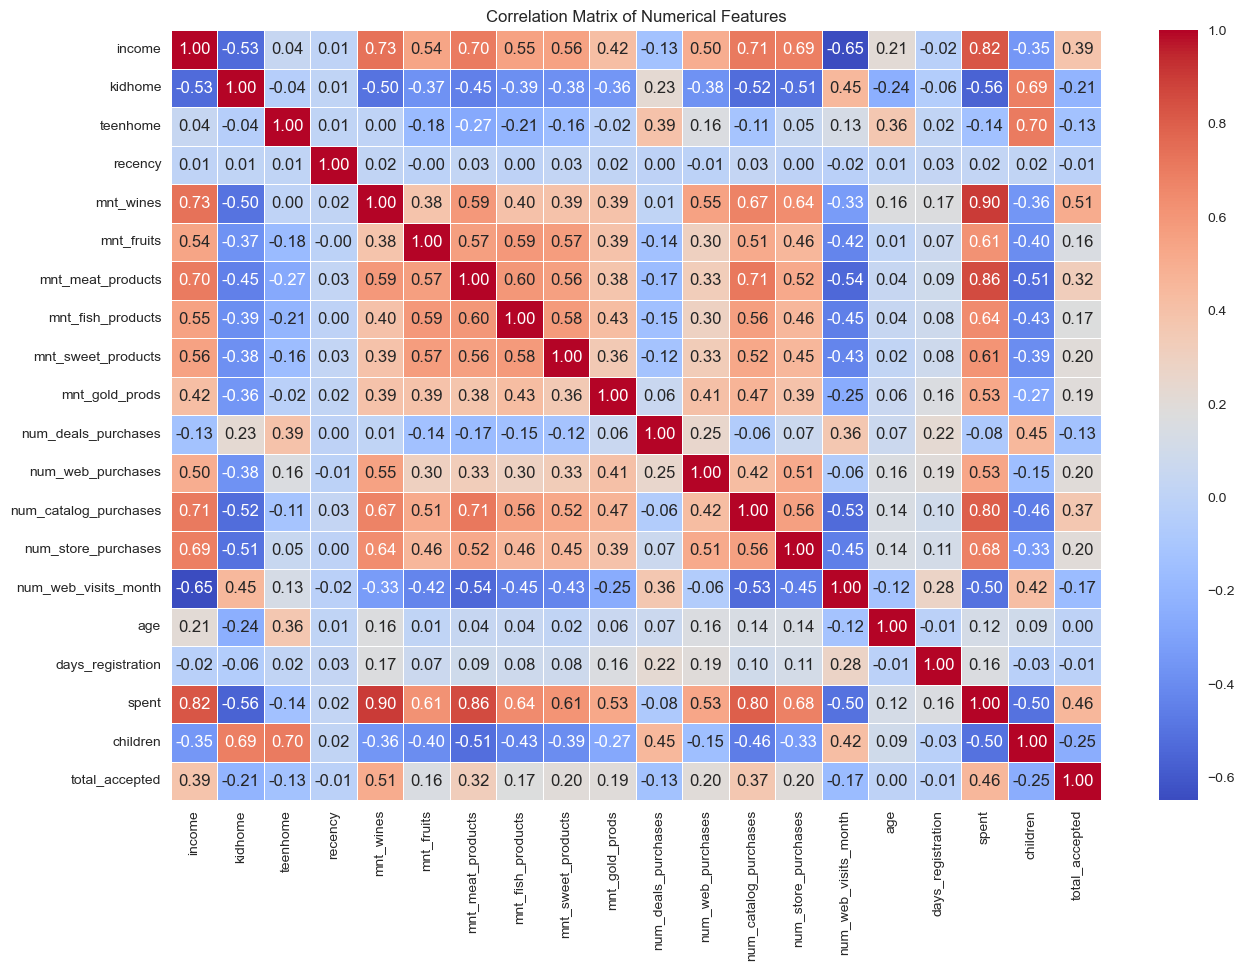

In [1392]:

correlation_matrix = numerical_df.corr()


plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [1393]:
pca = PCA(n_components=3)

In [1394]:
principal_components = pca.fit_transform(numerical_df)

In [1395]:
# Convert to DataFrame for easy viewing and visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])

# Display the first few rows
pca_df.head()



PCA Component 1  PCA Component 2  PCA Component 3
0             4.33             0.32             2.02
1            -2.84             0.25            -2.12
2             2.08            -0.63            -0.21
3            -2.71            -1.68             0.30
4            -0.45            -0.25             0.57

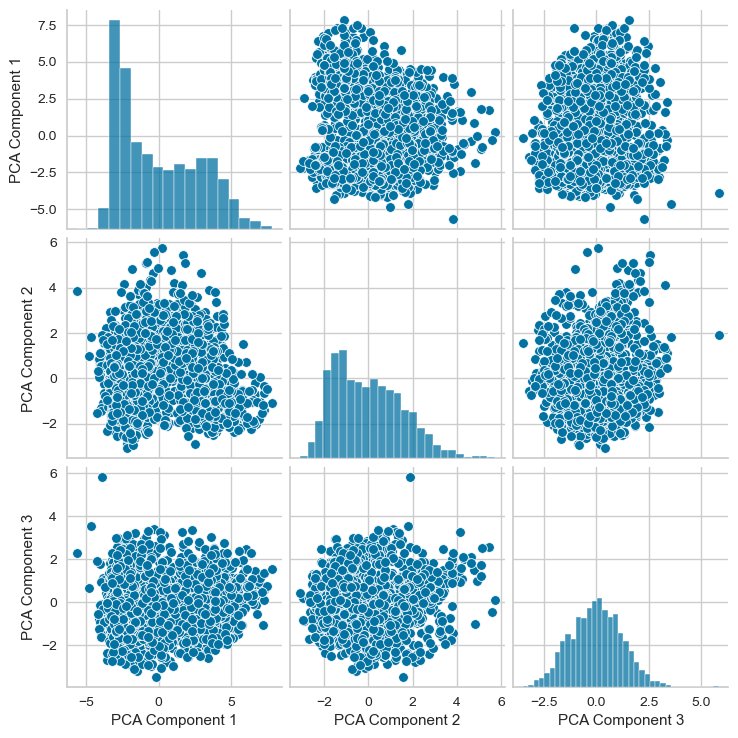

In [1396]:
sns.pairplot(pca_df)
plt.show()

In [1397]:
pca.components_

array([[ 0.30947404, -0.24333042, -0.06502337,  0.00512096,  0.28190518,
         0.24639081,  0.29675607,  0.25636678,  0.24727247,  0.20336911,
        -0.06200593,  0.19418379,  0.29969347,  0.26380698, -0.22684503,
         0.05024213,  0.03595038,  0.33958494, -0.22169124,  0.15358859],
       [ 0.09315294,  0.01528621,  0.50897188,  0.01821342,  0.1796408 ,
        -0.06793471, -0.07986365, -0.0782912 , -0.05330664,  0.12077763,
         0.47127029,  0.33485271,  0.04019565,  0.17021326,  0.18998921,
         0.26921884,  0.20436783,  0.06697236,  0.38077021, -0.01611987],
       [-0.19826696,  0.16717973, -0.33967154,  0.00488732,  0.04154628,
         0.07392215,  0.0486592 ,  0.07436497,  0.06840028,  0.16868115,
         0.2347371 ,  0.14777754, -0.00474692, -0.03728771,  0.40993162,
        -0.44641355,  0.54849857,  0.07176143, -0.12694729,  0.03636673]])

In [1398]:
eigenvectors_first_component = pca.components_[0]
eigenvectors_first_component

array([ 0.30947404, -0.24333042, -0.06502337,  0.00512096,  0.28190518,
        0.24639081,  0.29675607,  0.25636678,  0.24727247,  0.20336911,
       -0.06200593,  0.19418379,  0.29969347,  0.26380698, -0.22684503,
        0.05024213,  0.03595038,  0.33958494, -0.22169124,  0.15358859])

In [1399]:
eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([ 0.09315294,  0.01528621,  0.50897188,  0.01821342,  0.1796408 ,
       -0.06793471, -0.07986365, -0.0782912 , -0.05330664,  0.12077763,
        0.47127029,  0.33485271,  0.04019565,  0.17021326,  0.18998921,
        0.26921884,  0.20436783,  0.06697236,  0.38077021, -0.01611987])

In [1400]:
eigenvectors_third_component = pca.components_[2]
eigenvectors_third_component

array([-0.19826696,  0.16717973, -0.33967154,  0.00488732,  0.04154628,
        0.07392215,  0.0486592 ,  0.07436497,  0.06840028,  0.16868115,
        0.2347371 ,  0.14777754, -0.00474692, -0.03728771,  0.40993162,
       -0.44641355,  0.54849857,  0.07176143, -0.12694729,  0.03636673])

In [1401]:
numerical_df.loc[0]

income                   0.31
kidhome                 -0.82
teenhome                -0.93
recency                  0.31
mnt_wines                0.97
mnt_fruits               1.55
mnt_meat_products        1.75
mnt_fish_products        2.45
mnt_sweet_products       1.48
mnt_gold_prods           0.85
num_deals_purchases      0.36
num_web_purchases        1.42
num_catalog_purchases    2.63
num_store_purchases     -0.56
num_web_visits_month     0.69
age                      1.02
days_registration        1.53
spent                    1.68
children                -1.27
total_accepted          -0.44
Name: 0, dtype: float64

In [1402]:
(numerical_df.loc[0] * eigenvectors_first_component).sum()

4.32841784486293

In [1403]:
(numerical_df.loc[0] * eigenvectors_second_component).sum()

0.3223386483133153

In [1404]:
(numerical_df.loc[0] * eigenvectors_third_component).sum()

2.0196641413277003

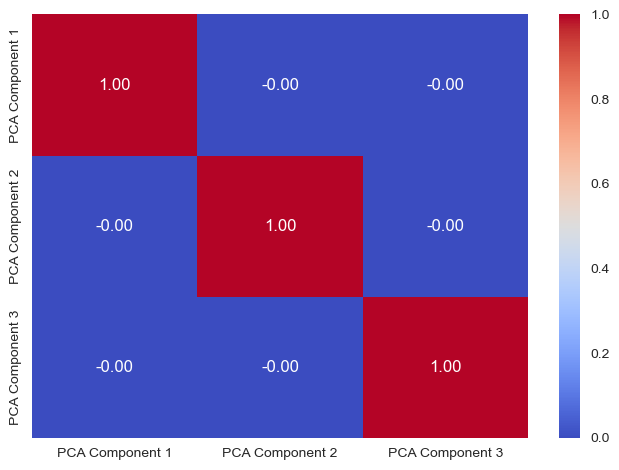

In [1405]:
sns.heatmap(pca_df.corr(), annot = True, fmt = '.2f', cmap='coolwarm');

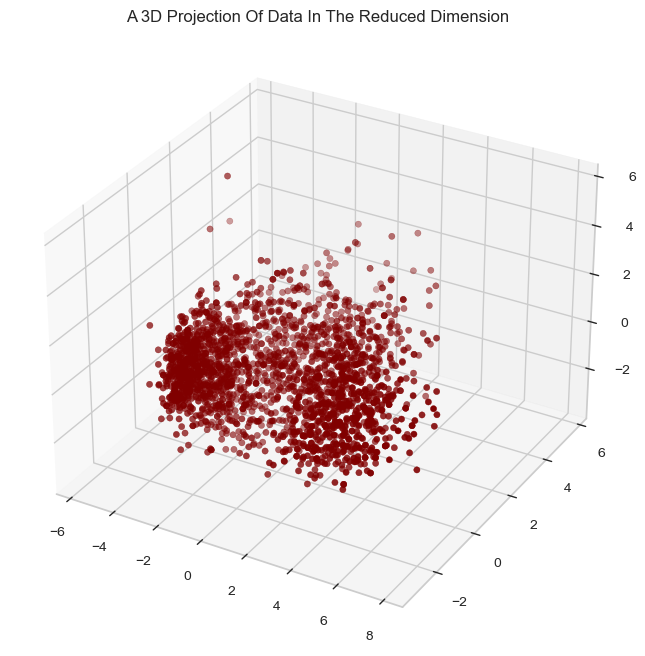

In [1406]:
#A 3D Projection Of Data In The Reduced Dimension
x =pca_df["PCA Component 1"]
y =pca_df["PCA Component 2"]
z =pca_df["PCA Component 3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [1407]:
pca.explained_variance_

array([7.82564107, 2.35290677, 1.46394859])

In [1408]:
pca.explained_variance_ratio_

array([0.3911046 , 0.11759198, 0.07316423])

In [1409]:
pca.explained_variance_ratio_.cumsum()

array([0.3911046 , 0.50869659, 0.58186082])

In [1410]:
pca = PCA(n_components=19).fit(scaled_numerical_features)

In [1411]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income                 2205 non-null   float64
 1   kidhome                2205 non-null   float64
 2   teenhome               2205 non-null   float64
 3   recency                2205 non-null   float64
 4   mnt_wines              2205 non-null   float64
 5   mnt_fruits             2205 non-null   float64
 6   mnt_meat_products      2205 non-null   float64
 7   mnt_fish_products      2205 non-null   float64
 8   mnt_sweet_products     2205 non-null   float64
 9   mnt_gold_prods         2205 non-null   float64
 10  num_deals_purchases    2205 non-null   float64
 11  num_web_purchases      2205 non-null   float64
 12  num_catalog_purchases  2205 non-null   float64
 13  num_store_purchases    2205 non-null   float64
 14  num_web_visits_month   2205 non-null   float64
 15  age 

In [1412]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}

In [1413]:
df_ev = pd.DataFrame(my_dict, index=range(1,20))
df_ev

explained_variance  explained_variance_ratio  \
1                 7.83                      0.39   
2                 2.35                      0.12   
3                 1.46                      0.07   
4                 1.16                      0.06   
5                 1.02                      0.05   
6                 1.00                      0.05   
7                 0.74                      0.04   
8                 0.69                      0.03   
9                 0.58                      0.03   
10                0.57                      0.03   
11                0.46                      0.02   
12                0.43                      0.02   
13                0.40                      0.02   
14                0.39                      0.02   
15                0.31                      0.02   
16                0.26                      0.01   
17                0.22                      0.01   
18                0.14                      0.01   
19                0.00                      0.00   

    cumsum_explained_variance_ratio  
1                              0.39  
2                              0.51  
3                              0.58  
4                              0.64  
5                              0.69  
6                              0.74  
7                              0.78  
8                              0.81  
9                              0.84  
10                             0.87  
11                             0.89  
12                             0.91  
13                             0.93  
14                             0.95  
15                             0.97  
16                             0.98  
17                             0.99  
18                             1.00  
19                                1

In [1414]:
df_ev.explained_variance.sum()


20.009074410163347

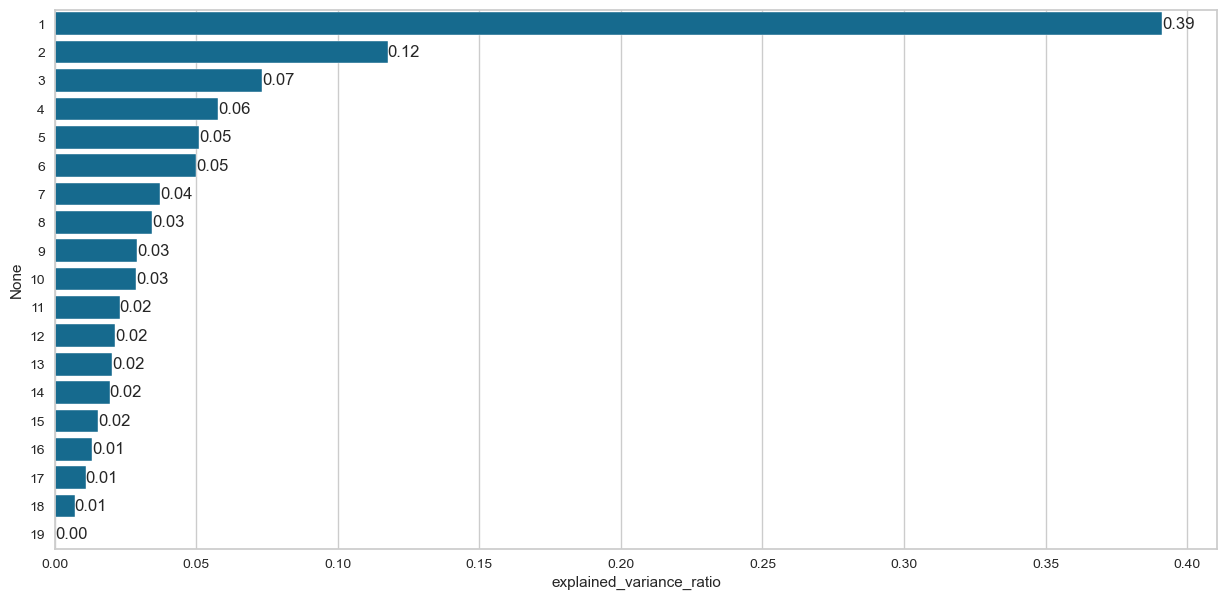

In [1415]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.2f");

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clsutering

# Built K-Means with PCA algorithm

In [1416]:
pca = PCA(n_components=3)

In [1417]:
principal_components = pca.fit_transform(numerical_df)
principal_components

array([[ 4.32841784,  0.32233865,  2.01966414],
       [-2.83770685,  0.2543403 , -2.12219063],
       [ 2.0756736 , -0.62933855, -0.21072723],
       ...,
       [ 2.02257059, -1.24958228,  0.11070669],
       [ 1.89736538,  0.89740516, -1.88172596],
       [-2.27651796,  1.62217773, -0.1652997 ]])

In [1418]:
pca_df = pd.DataFrame(data=principal_components, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
pca_df

PCA Component 1  PCA Component 2  PCA Component 3
0                4.33             0.32             2.02
1               -2.84             0.25            -2.12
2                2.08            -0.63            -0.21
3               -2.71            -1.68             0.30
4               -0.45            -0.25             0.57
...               ...              ...              ...
2200             2.73             1.61             0.62
2201            -2.00             3.64            -1.24
2202             2.02            -1.25             0.11
2203             1.90             0.90            -1.88
2204            -2.28             1.62            -0.17

[2205 rows x 3 columns]

# K-Means Algorithm

In [1419]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [1420]:
pca_df

PCA Component 1  PCA Component 2  PCA Component 3
0                4.33             0.32             2.02
1               -2.84             0.25            -2.12
2                2.08            -0.63            -0.21
3               -2.71            -1.68             0.30
4               -0.45            -0.25             0.57
...               ...              ...              ...
2200             2.73             1.61             0.62
2201            -2.00             3.64            -1.24
2202             2.02            -1.25             0.11
2203             1.90             0.90            -1.88
2204            -2.28             1.62            -0.17

[2205 rows x 3 columns]

In [1421]:
hopkins(pca_df, 1)
# We can say that our data consisting of new components is
# randomly distributed and has a high tendency to cluster.

0.8610899745953274

#### Determine optimal number of clusters

### inertia

In [1422]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

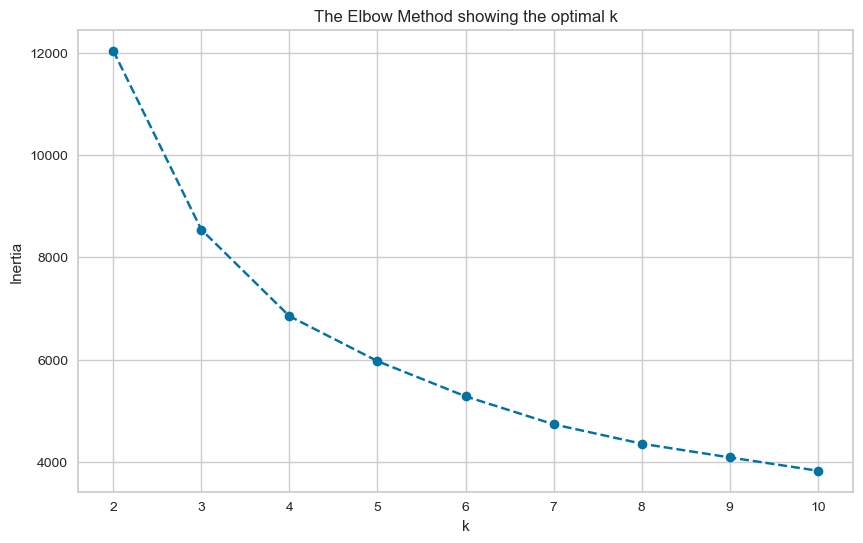

In [1423]:
elbow_vis(pca_df, k_range=range(2, 11), inertia=True )

### distortion

In [1424]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(pca_df)
    distances = kmeanModel.transform(pca_df) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

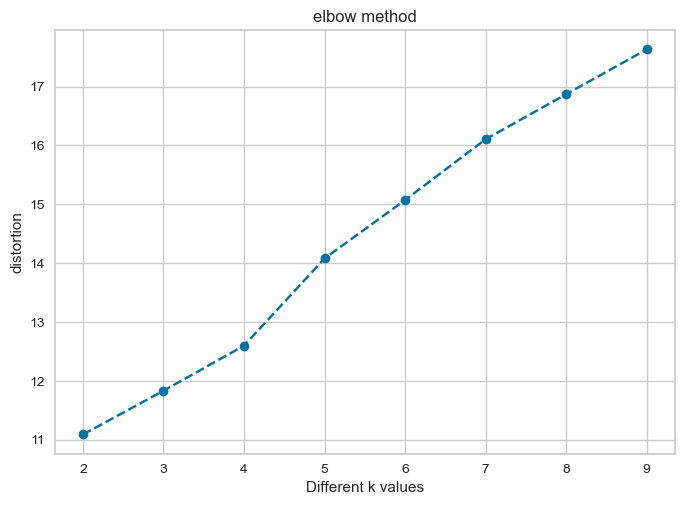

In [1425]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

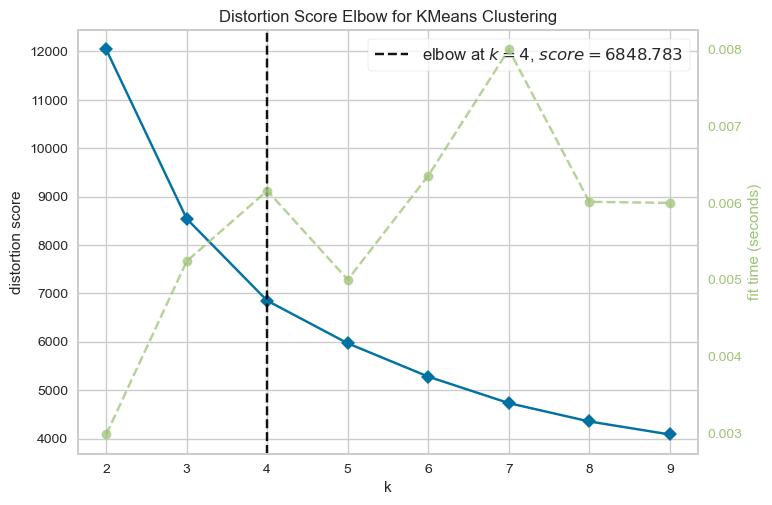

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1426]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(pca_df)
visu.poof()

### silhoutte score

In [1427]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pca_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.46178748724850494
For n_clusters=3, the silhouette score is 0.4028250915410117
For n_clusters=4, the silhouette score is 0.3674518376998695
For n_clusters=5, the silhouette score is 0.3548054338852873
For n_clusters=6, the silhouette score is 0.3540025790258387
For n_clusters=7, the silhouette score is 0.32907677908448196
For n_clusters=8, the silhouette score is 0.3124121971126536


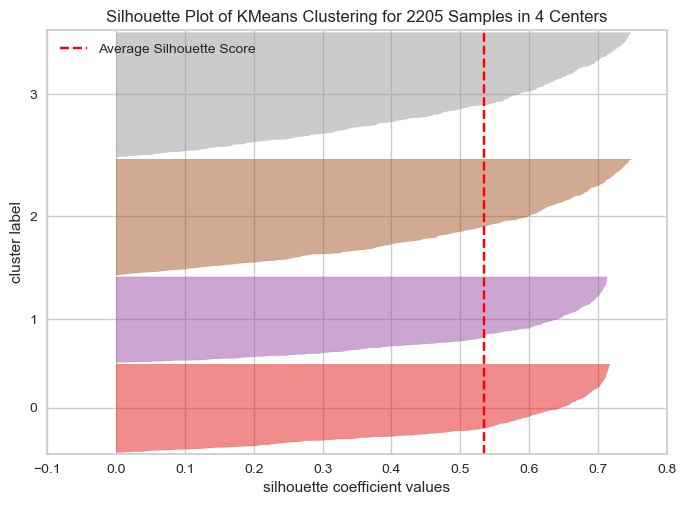

In [1428]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=4!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

#### Apply K Means

In [1429]:
kmeans = KMeans(n_clusters = 4, random_state=42)

In [1430]:
kmeans.fit_predict(pca_df)

array([0, 2, 0, ..., 0, 3, 2])

In [1431]:
pca_df["cluster_Kmeans"] = kmeans.fit_predict(pca_df)

In [1432]:
pca_df

PCA Component 1  PCA Component 2  PCA Component 3  cluster_Kmeans
0                4.33             0.32             2.02               0
1               -2.84             0.25            -2.12               2
2                2.08            -0.63            -0.21               0
3               -2.71            -1.68             0.30               1
4               -0.45            -0.25             0.57               1
...               ...              ...              ...             ...
2200             2.73             1.61             0.62               3
2201            -2.00             3.64            -1.24               2
2202             2.02            -1.25             0.11               0
2203             1.90             0.90            -1.88               3
2204            -2.28             1.62            -0.17               2

[2205 rows x 4 columns]

# K-means Clustering

# Create a new dataset with numeric features

In [1433]:
df1 = pd.DataFrame(numerical_features, columns = numerical_features.columns)

In [1434]:
df1. head()

income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0   58138        0         0       58        635          88   
1   46344        1         1       38         11           1   
2   71613        0         0       26        426          49   
3   26646        1         0       26         11           4   
4   58293        1         0       94        173          43   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0                546                172                  88              88   
1                  6                  2                   1               6   
2                127                111                  21              42   
3                 20                 10                   3               5   
4                118                 46                  27              15   

   num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                    3                  8                     10   
1                    2                  1                      1   
2                    1                  8                      2   
3                    2                  2                      0   
4                    5                  5                      3   

   num_store_purchases  num_web_visits_month  age  days_registration  spent  \
0                    4                     7   57                848   1617   
1                    2                     5   60                298     27   
2                   10                     4   49                497    776   
3                    4                     6   30                324     53   
4                    6                     5   33                346    422   

   children  total_accepted  
0         0               0  
1         2               0  
2         0               0  
3         1               0  
4         1               0

In [1435]:
df1.kidhome.value_counts()

kidhome
0    1276
1     883
2      46
Name: count, dtype: int64

In [1436]:
df1.teenhome.value_counts()

teenhome
0    1139
1    1015
2      51
Name: count, dtype: int64

In [1437]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income                 2205 non-null   float64
 1   kidhome                2205 non-null   int64  
 2   teenhome               2205 non-null   int64  
 3   recency                2205 non-null   int64  
 4   mnt_wines              2205 non-null   int64  
 5   mnt_fruits             2205 non-null   int64  
 6   mnt_meat_products      2205 non-null   int64  
 7   mnt_fish_products      2205 non-null   int64  
 8   mnt_sweet_products     2205 non-null   int64  
 9   mnt_gold_prods         2205 non-null   int64  
 10  num_deals_purchases    2205 non-null   int64  
 11  num_web_purchases      2205 non-null   int64  
 12  num_catalog_purchases  2205 non-null   int64  
 13  num_store_purchases    2205 non-null   int64  
 14  num_web_visits_month   2205 non-null   int64  
 15  age 

In [1438]:
df1.shape

(2205, 20)

In [1439]:
df1.describe().T

count      mean       std  min   25%   50%   75%    max
income                  2205 51,622.09 20,713.06 1730 35196 51287 68281 113734
kidhome                 2205      0.44      0.54    0     0     0     1      2
teenhome                2205      0.51      0.54    0     0     0     1      2
recency                 2205     49.01     28.93    0    24    49    74     99
mnt_wines               2205    306.16    337.49    0    24   178   507   1493
mnt_fruits              2205     26.40     39.78    0     2     8    33    199
mnt_meat_products       2205    165.31    217.78    0    16    68   232   1725
mnt_fish_products       2205     37.76     54.82    0     3    12    50    259
mnt_sweet_products      2205     27.13     41.13    0     1     8    34    262
mnt_gold_prods          2205     44.06     51.74    0     9    25    56    321
num_deals_purchases     2205      2.32      1.89    0     1     2     3     15
num_web_purchases       2205      4.10      2.74    0     2     4     6     27
num_catalog_purchases   2205      2.65      2.80    0     0     2     4     28
num_store_purchases     2205      5.82      3.24    0     3     5     8     13
num_web_visits_month    2205      5.34      2.41    0     3     6     7     20
age                     2205     45.10     11.71   18    37    44    55     74
days_registration       2205    538.72    202.56  185   365   541   714    884
spent                   2205    606.82    601.68    5    69   397  1047   2525
children                2205      0.95      0.75    0     0     1     1      3
total_accepted          2205      0.30      0.68    0     0     0     0      4

In [1440]:
X = df1.copy()

In [1441]:
scaler = StandardScaler()

In [1442]:
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 0.31465086, -0.82340514, -0.93076676, ...,  1.67932338,
        -1.26658936, -0.4399912 ],
       [-0.25487741,  1.03875725,  0.90660182, ..., -0.96389748,
         1.40341976, -0.4399912 ],
       [ 0.96535404, -0.82340514, -0.93076676, ...,  0.28124241,
        -1.26658936, -0.4399912 ],
       ...,
       [ 0.25877972, -0.82340514, -0.93076676, ...,  1.05425983,
        -1.26658936,  1.0299794 ],
       [ 0.85100412, -0.82340514,  0.90660182, ...,  0.39262341,
         0.0684152 , -0.4399912 ],
       [ 0.06021263,  1.03875725,  0.90660182, ..., -0.72284904,
         1.40341976, -0.4399912 ]])

In [1443]:
X1 = pd.DataFrame(scaled_X, columns = X.columns)
X1.head()

income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0    0.31    -0.82     -0.93     0.31       0.97        1.55   
1   -0.25     1.04      0.91    -0.38      -0.87       -0.64   
2    0.97    -0.82     -0.93    -0.80       0.36        0.57   
3   -1.21     1.04     -0.93    -0.80      -0.87       -0.56   
4    0.32     1.04     -0.93     1.56      -0.39        0.42   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0               1.75               2.45                1.48            0.85   
1              -0.73              -0.65               -0.64           -0.74   
2              -0.18               1.34               -0.15           -0.04   
3              -0.67              -0.51               -0.59           -0.76   
4              -0.22               0.15               -0.00           -0.56   

   num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                 0.36               1.42                   2.63   
1                -0.17              -1.13                  -0.59   
2                -0.70               1.42                  -0.23   
3                -0.17              -0.77                  -0.95   
4                 1.42               0.33                   0.13   

   num_store_purchases  num_web_visits_month   age  days_registration  spent  \
0                -0.56                  0.69  1.02               1.53   1.68   
1                -1.18                 -0.14  1.27              -1.19  -0.96   
2                 1.29                 -0.55  0.33              -0.21   0.28   
3                -0.56                  0.27 -1.29              -1.06  -0.92   
4                 0.05                 -0.14 -1.03              -0.95  -0.31   

   children  total_accepted  
0     -1.27           -0.44  
1      1.40           -0.44  
2     -1.27           -0.44  
3      0.07           -0.44  
4      0.07           -0.44

In [1444]:
X1.shape

(2205, 20)

# Hopkins test

In [1445]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [1446]:
hopkins(X1, ratio = 0.05)

0.8565833991454759

In [1447]:
hopkins(X1, 1)

0.849350623382839

# Determine optimal number of clusters

# inertia

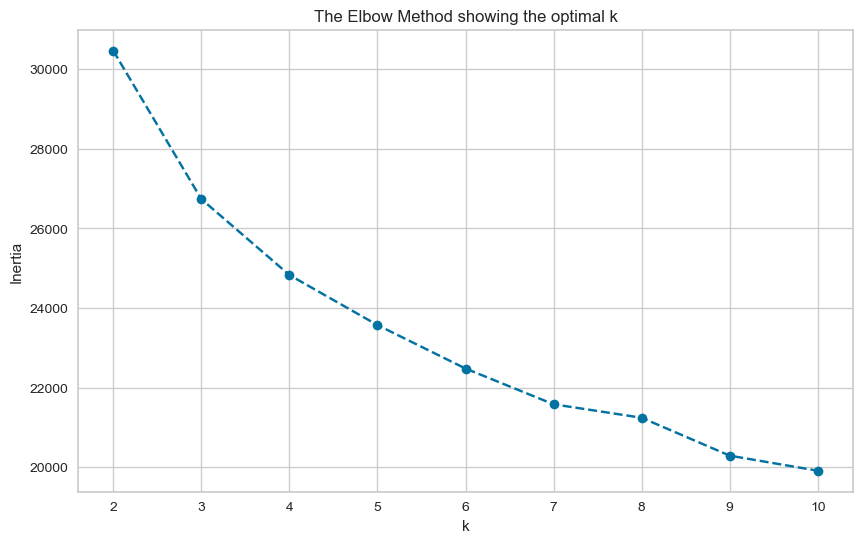

In [1448]:
elbow_vis(X1)

# distortion

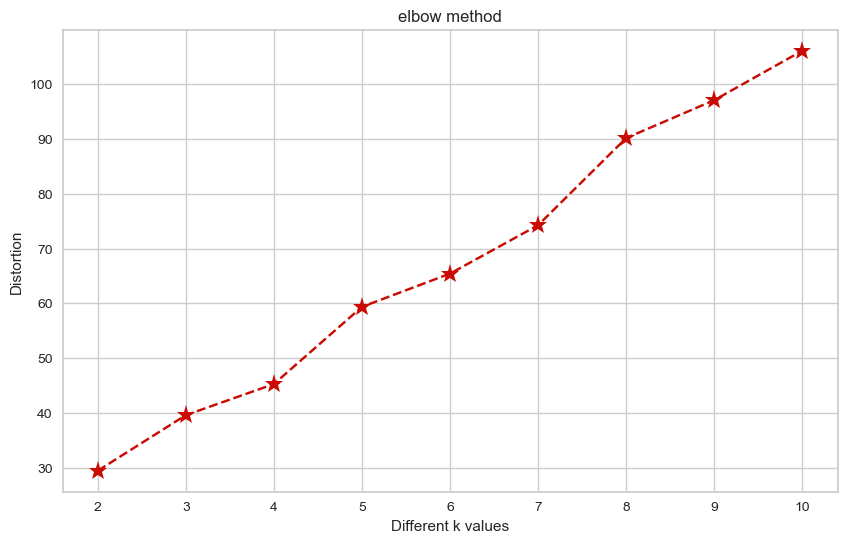

In [1449]:
elbow_vis(X1, inertia = False)


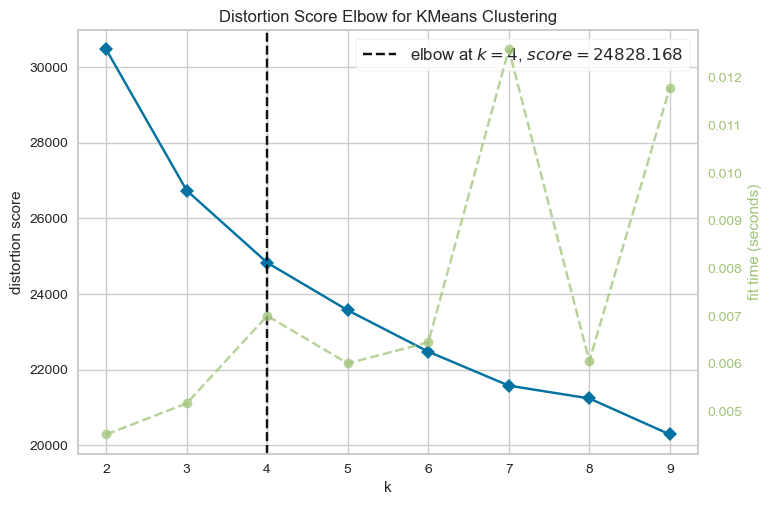

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1450]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.poof()

# silhoutte score

In [1451]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.30057844758777846
For n_clusters=3, the silhouette score is 0.22080886259037422
For n_clusters=4, the silhouette score is 0.1602817440238883
For n_clusters=5, the silhouette score is 0.15474096429592832
For n_clusters=6, the silhouette score is 0.15427716783266343
For n_clusters=7, the silhouette score is 0.15307268443526698
For n_clusters=8, the silhouette score is 0.14832305493758688


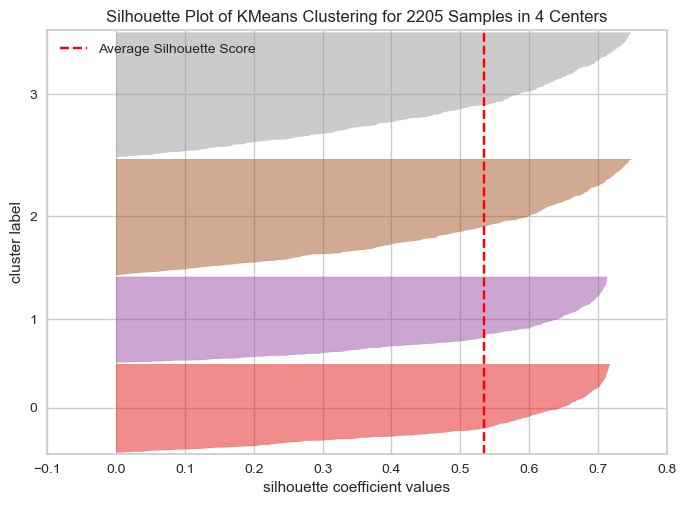

In [1452]:
from yellowbrick.cluster import SilhouetteVisualizer

model_1 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=4!
visualizer = SilhouetteVisualizer(model_1)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

# Apply K Means

In [1453]:
kmeans = KMeans(n_clusters = 4, random_state=42)

In [1454]:
kmeans.fit_predict(X1)

array([0, 2, 0, ..., 0, 3, 2])

In [1455]:
clusters = kmeans.labels_
clusters

array([0, 2, 0, ..., 0, 3, 2])

In [1456]:
df1.head()

income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0   58138        0         0       58        635          88   
1   46344        1         1       38         11           1   
2   71613        0         0       26        426          49   
3   26646        1         0       26         11           4   
4   58293        1         0       94        173          43   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0                546                172                  88              88   
1                  6                  2                   1               6   
2                127                111                  21              42   
3                 20                 10                   3               5   
4                118                 46                  27              15   

   num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                    3                  8                     10   
1                    2                  1                      1   
2                    1                  8                      2   
3                    2                  2                      0   
4                    5                  5                      3   

   num_store_purchases  num_web_visits_month  age  days_registration  spent  \
0                    4                     7   57                848   1617   
1                    2                     5   60                298     27   
2                   10                     4   49                497    776   
3                    4                     6   30                324     53   
4                    6                     5   33                346    422   

   children  total_accepted  
0         0               0  
1         2               0  
2         0               0  
3         1               0  
4         1               0

In [1457]:
df1['predicted_clusters'] = clusters

In [1458]:
df1['response'] = target

In [1459]:
df1.head()

income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0   58138        0         0       58        635          88   
1   46344        1         1       38         11           1   
2   71613        0         0       26        426          49   
3   26646        1         0       26         11           4   
4   58293        1         0       94        173          43   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0                546                172                  88              88   
1                  6                  2                   1               6   
2                127                111                  21              42   
3                 20                 10                   3               5   
4                118                 46                  27              15   

   ...  num_catalog_purchases  num_store_purchases  num_web_visits_month  age  \
0  ...                     10                    4                     7   57   
1  ...                      1                    2                     5   60   
2  ...                      2                   10                     4   49   
3  ...                      0                    4                     6   30   
4  ...                      3                    6                     5   33   

   days_registration  spent  children  total_accepted  predicted_clusters  \
0                848   1617         0               0                   0   
1                298     27         2               0                   2   
2                497    776         0               0                   0   
3                324     53         1               0                   1   
4                346    422         1               0                   1   

   response  
0         1  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

# Visualizing and Labeling All the Clusters

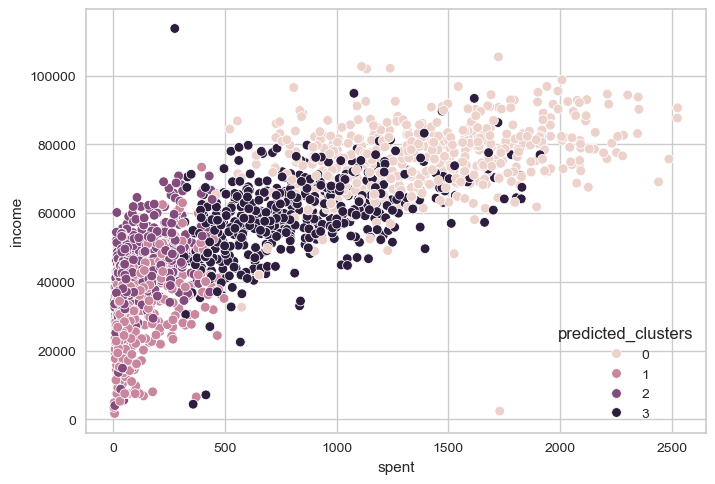

In [1460]:
sns.scatterplot(data=df1, x="spent", y="income", hue="predicted_clusters");

In [1461]:
clusters = range(4)  # 0, 1, 2, 3

cluster_means = []

# Her küme için ortalama 'income' ve 'spent' değerlerini hesapla
for cluster in clusters:
    cluster_data = df1[df1['predicted_clusters'] == cluster][['income', 'spent']].mean()
    cluster_means.append({
        'cluster': cluster,
        'income_mean': cluster_data['income'],
        'spent_mean': cluster_data['spent']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df

cluster  income_mean  spent_mean
0        0    76,183.77    1,397.73
1        1    30,003.16      108.24
2        2    42,244.58      129.00
3        3    59,685.21      814.50

In [1462]:
df['predicted_clusters'] = df1['predicted_clusters']

In [1463]:
df[df['predicted_clusters'] == 0].groupby(['education',  'marital_status', 'children'])['spent'].mean()

education         marital_status  children
high_edu_level    Relationship    0          1,503.34
                                  1          1,587.33
                  Single          0          1,380.12
                                  1              1482
lower_edu_level   Relationship    0          1,428.28
                                  1          1,319.88
                  Single          0          1,342.43
                                  1          1,296.47
medium_edu_level  Relationship    0          1,338.46
                                  1              1045
                  Single          0          1,553.79
                                  1          1,330.60
                                  2              1695
Name: spent, dtype: float64

In [1464]:
df[df['predicted_clusters'] == 1].groupby(['education',  'marital_status', 'children'])['spent'].mean()

education         marital_status  children
high_edu_level    Relationship    0          295.75
                                  1          100.68
                                  2              17
                  Single          0          122.83
                                  1          101.79
                                  2             131
lower_edu_level   Relationship    0          127.14
                                  1           95.75
                                  2           95.62
                  Single          0          107.43
                                  1           96.07
                                  2          244.50
medium_edu_level  Relationship    0          169.71
                                  1           95.32
                                  2           46.50
                  Single          0          146.85
                                  1          111.56
                                  2              10
Name: spent, dtype: f

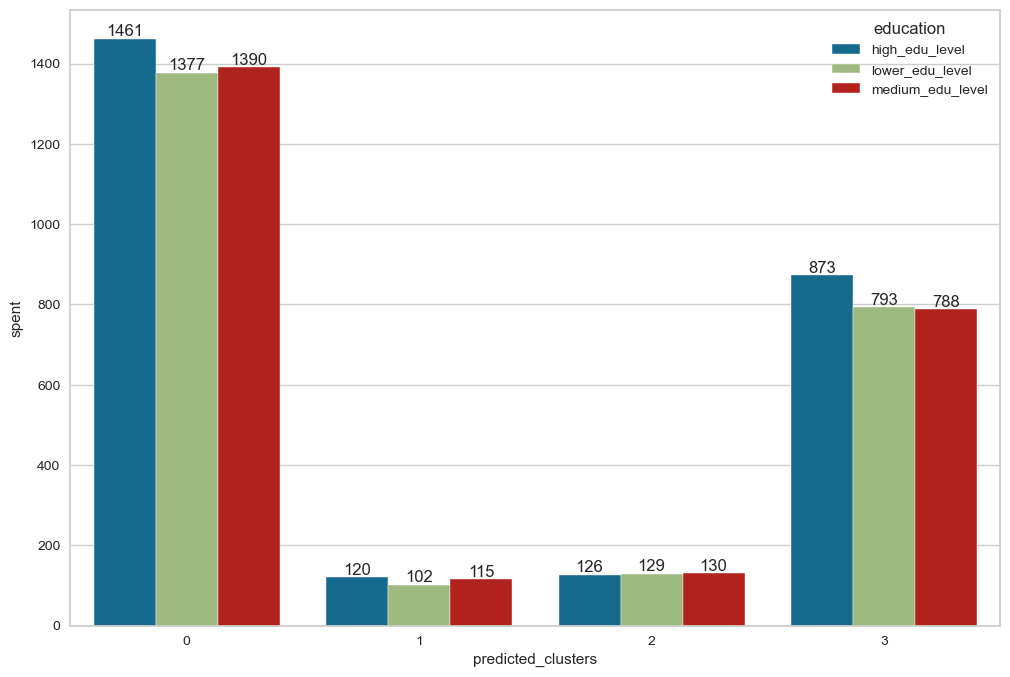

In [1465]:
# Kümeleri belirle
clusters = df['predicted_clusters'].unique()

# Sonuçları saklamak için boş bir liste oluştur
cluster_family_spent = []

# Her küme için 'education' sütununa göre gruplama yaparak ortalama 'spent' değerlerini hesapla
for cluster in clusters:
    cluster_data = df[df['predicted_clusters'] == cluster]
    grouped_data = cluster_data.groupby('education')['spent'].mean().reset_index()
    grouped_data['predicted_clusters'] = cluster
    cluster_family_spent.append(grouped_data)

# Listeyi DataFrame'e dönüştür
cluster_family_spent_df = pd.concat(cluster_family_spent, ignore_index=True)

# Grafiği çiz
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=cluster_family_spent_df, x='predicted_clusters', y='spent', hue='education')

for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

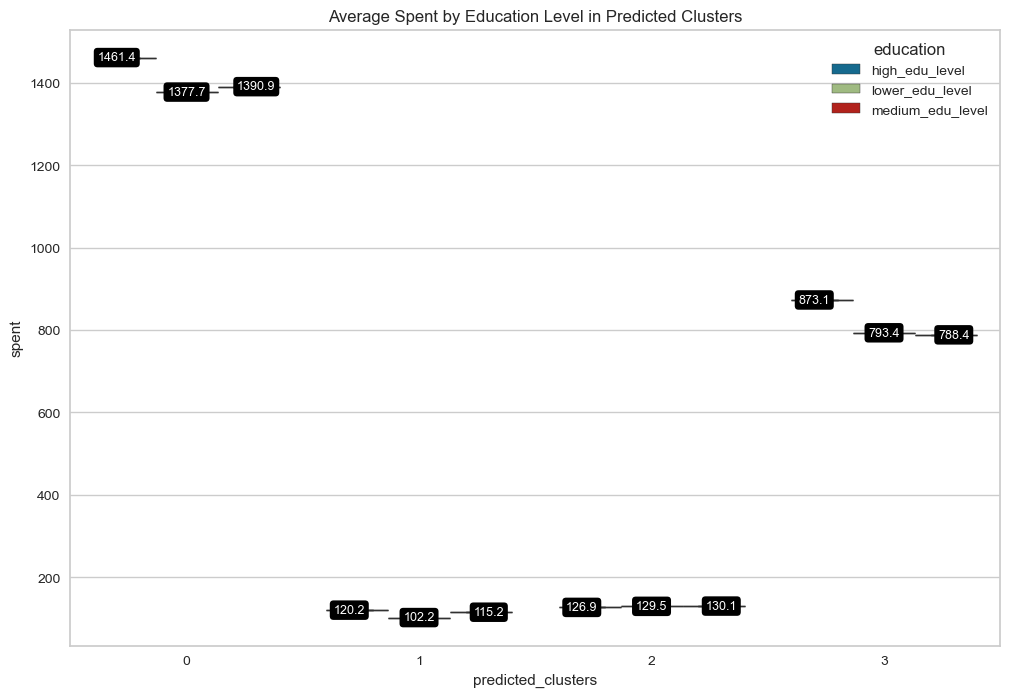

In [1466]:
# Kümeleri belirle
clusters = df['predicted_clusters'].unique()

# Sonuçları saklamak için boş bir liste oluştur
cluster_family_spent = []

# Her küme için 'education' sütununa göre gruplama yaparak ortalama 'spent' değerlerini hesapla
for cluster in clusters:
    cluster_data = df[df['predicted_clusters'] == cluster]
    grouped_data = cluster_data.groupby('education')['spent'].mean().reset_index()
    grouped_data['predicted_clusters'] = cluster
    cluster_family_spent.append(grouped_data)

# Listeyi DataFrame'e dönüştür
cluster_family_spent_df = pd.concat(cluster_family_spent, ignore_index=True)

# Grafiği çiz
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=cluster_family_spent_df, x='predicted_clusters', y='spent', hue='education')

# Ortalama değerleri hesapla ve annotate et
means = cluster_family_spent_df.groupby(['predicted_clusters', 'education'])['spent'].mean().reset_index()
means_pivot = means.pivot(index='predicted_clusters', columns='education', values='spent')

for tick, label in enumerate(ax.get_xticklabels()):
    cluster = int(label.get_text())
    for i, edu in enumerate(means_pivot.columns):
        mean_value = means_pivot.loc[cluster, edu]
        ax.annotate(f'{mean_value:.1f}', 
                    xy=(tick - 0.3 + (i * 0.6 / (len(means_pivot.columns) - 1)), mean_value), 
                    ha='center', va='center', fontsize=9, color='white', 
                    bbox=dict(facecolor='black', edgecolor='none', boxstyle='round,pad=0.3'))

plt.title('Average Spent by Education Level in Predicted Clusters')
plt.show()

In [1467]:
clus_pred = df1.groupby("predicted_clusters").mean()
clus_pred

income  kidhome  teenhome  recency  mnt_wines  \
predicted_clusters                                                    
0                  76,183.77     0.03      0.13    49.31     621.27   
1                  30,003.16     0.79      0.01    49.04      36.16   
2                  42,244.58     0.75      1.05    49.49      74.33   
3                  59,685.21     0.17      0.93    48.24     504.87   

                    mnt_fruits  mnt_meat_products  mnt_fish_products  \
predicted_clusters                                                     
0                        67.51             460.65             100.83   
1                         7.10              28.21              10.87   
2                         3.88              26.50               5.49   
3                        27.87             152.86              34.93   

                    mnt_sweet_products  mnt_gold_prods  ...  \
predicted_clusters                                      ...   
0                                70.47           77.01  ...   
1                                 7.25           18.66  ...   
2                                 3.96           14.85  ...   
3                                27.63           66.35  ...   

                    num_web_purchases  num_catalog_purchases  \
predicted_clusters                                             
0                                5.06                   6.01   
1                                2.29                   0.57   
2                                2.41                   0.74   
3                                6.69                   3.36   

                    num_store_purchases  num_web_visits_month   age  \
predicted_clusters                                                    
0                                  8.43                  2.75 45.43   
1                                  3.22                  6.82 37.07   
2                                  3.63                  6.01 49.67   
3                                  8.13                  5.64 49.25   

                    days_registration    spent  children  total_accepted  \
predicted_clusters                                                         
0                              535.66 1,397.73      0.16            0.75   
1                              527.61   108.24      0.80            0.09   
2                              490.55   129.00      1.80            0.09   
3                              598.39   814.50      1.10            0.28   

                    response  
predicted_clusters            
0                       0.14  
1                       0.16  
2                       0.17  
3                       0.13  

[4 rows x 21 columns]

In [1468]:
clus_pred.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'age', 'days_registration', 'spent', 'children', 'total_accepted',
       'response'],
      dtype='object')

In [1469]:
sca = MinMaxScaler()
clus_pred2 = sca.fit_transform(clus_pred)
scaled_clus = pd.DataFrame(clus_pred2, columns=clus_pred.columns)

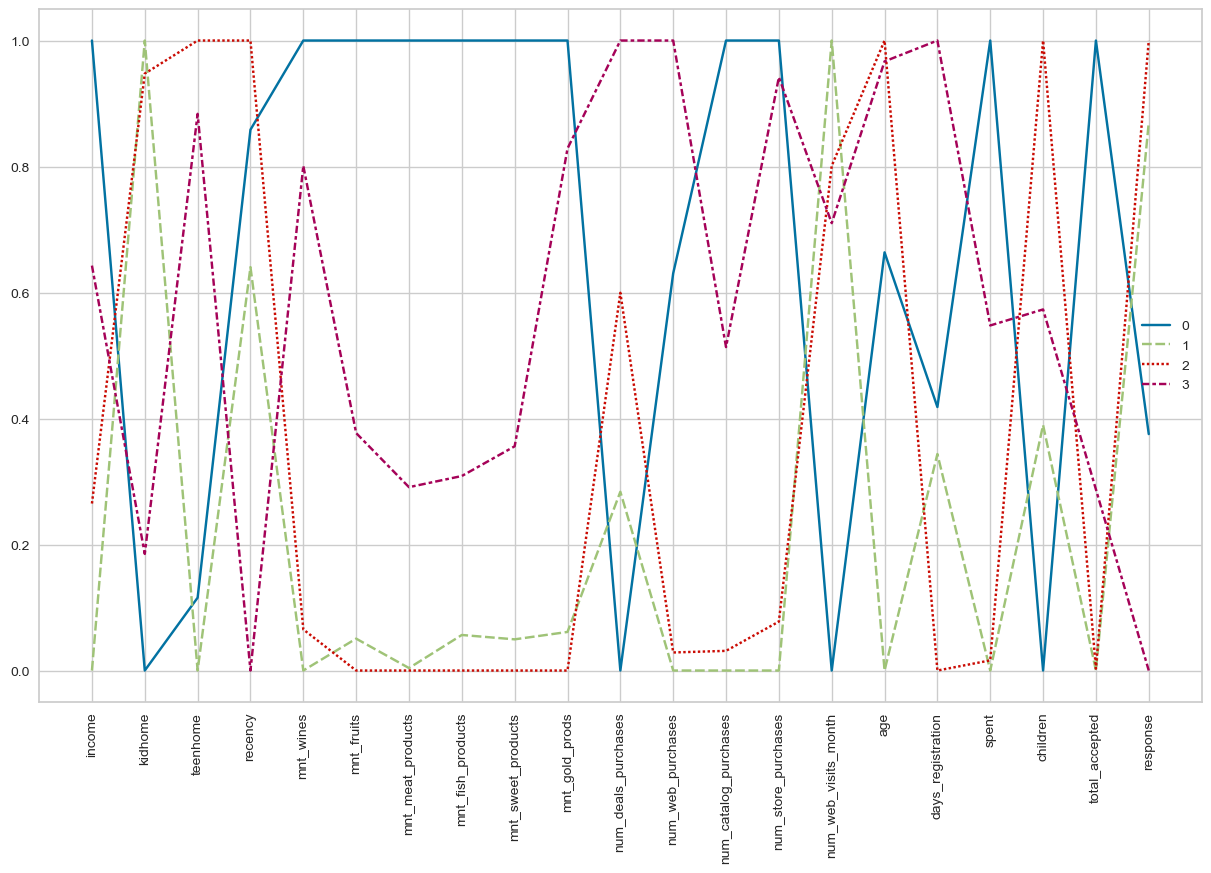

In [1470]:
plt.figure(figsize=(15,9))
sns.lineplot(data = scaled_clus.T)
plt.xticks(rotation=90);

income, num_deals_purchases, children, spent, days_registration, response

# Clustering based on selected features

#### Select features from existing data

In [1471]:
X2 = df1[['income', 'num_deals_purchases', 'children', 'spent']]

In [1472]:
scaler = MinMaxScaler()
scaled_X2 = scaler.fit_transform(X2)
scaled_X2

array([[0.50362487, 0.2       , 0.        , 0.63968254],
       [0.39832506, 0.13333333, 0.66666667, 0.00873016],
       [0.62393307, 0.06666667, 0.        , 0.30595238],
       ...,
       [0.49329488, 0.06666667, 0.        , 0.49047619],
       [0.60279097, 0.13333333, 0.33333333, 0.33253968],
       [0.45658191, 0.2       , 0.66666667, 0.06626984]])

In [1473]:
data = pd.DataFrame(scaled_X2, columns = X2.columns)
data.head()

income  num_deals_purchases  children  spent
0    0.50                 0.20         0   0.64
1    0.40                 0.13      0.67   0.01
2    0.62                 0.07         0   0.31
3    0.22                 0.13      0.33   0.02
4    0.51                 0.33      0.33   0.17

In [1474]:
hopkins(data)

0.9553751440232157

In [1475]:
hopkins(data, 1)

0.9452658709338686

#### Determine optimal number of clusters for selected features

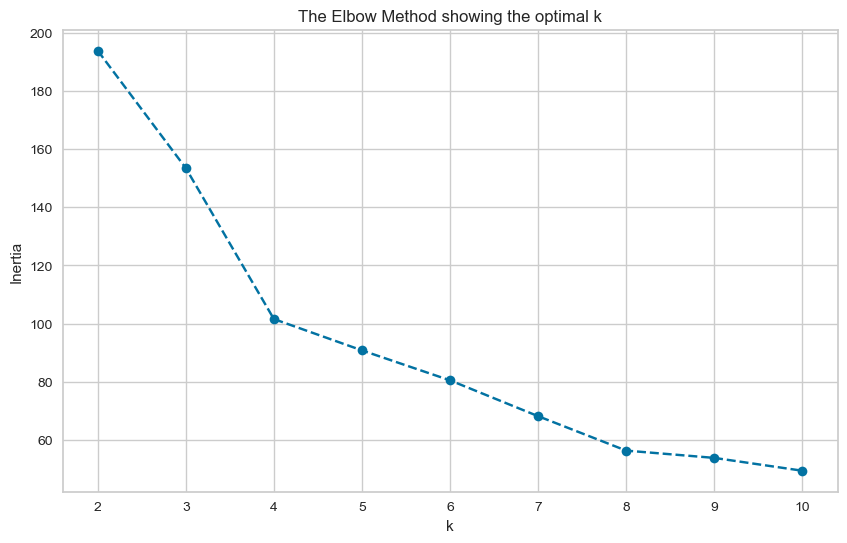

In [1476]:
elbow_vis(data)

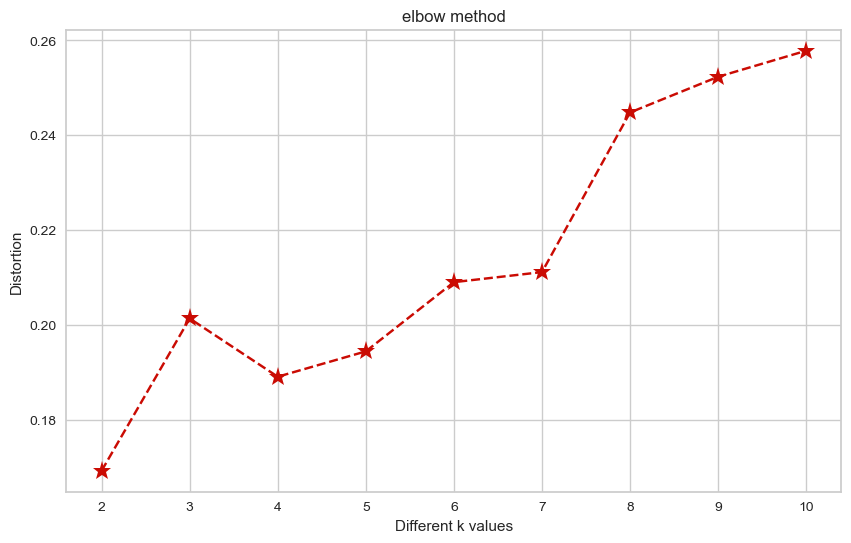

In [1477]:
elbow_vis(data, inertia = False)

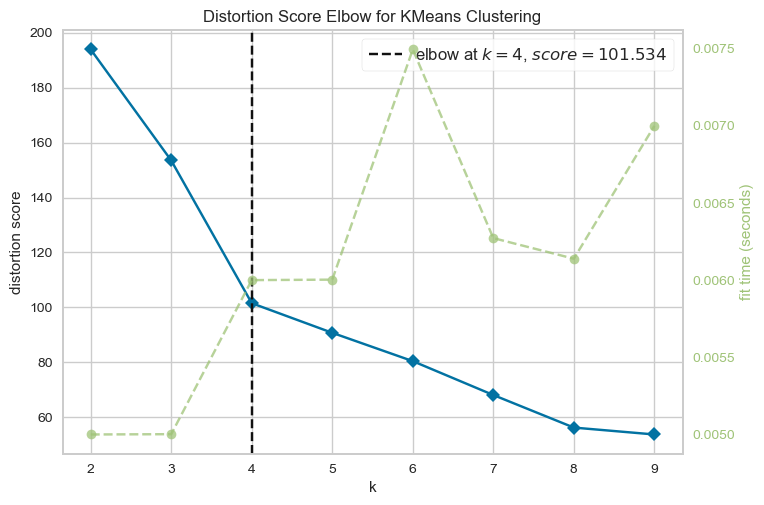

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1478]:
kmeans = KMeans(random_state = 42)
visu = KElbowVisualizer(kmeans, k = (2, 10))
visu.fit(data)
visu.poof()

In [1479]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.43616824337746296
For n_clusters=3, the silhouette score is 0.36098757963842915
For n_clusters=4, the silhouette score is 0.43296411285328046
For n_clusters=5, the silhouette score is 0.4035861641975694
For n_clusters=6, the silhouette score is 0.35025847671039156
For n_clusters=7, the silhouette score is 0.38672942789519615
For n_clusters=8, the silhouette score is 0.40980745230296267
For n_clusters=9, the silhouette score is 0.3901501507538502


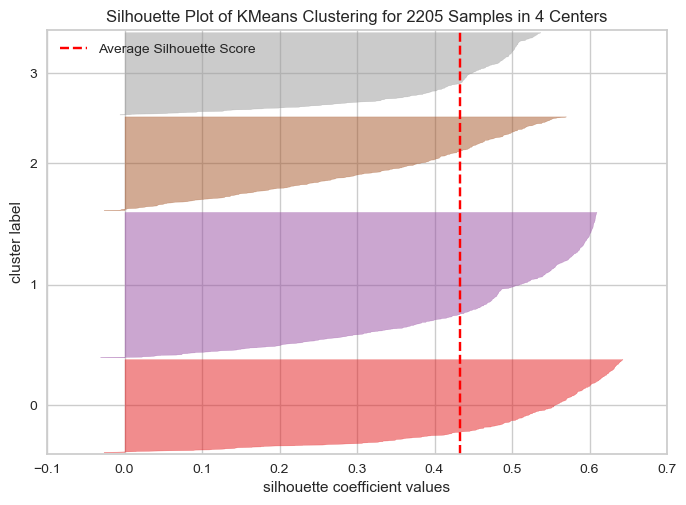

In [1480]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=4!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

#### Building the model based on the optimal number of clusters with selected features

In [1481]:
K_means_model = KMeans(n_clusters = 4, random_state=42)
K_means_model.fit_predict(data)

array([0, 3, 0, ..., 0, 2, 3])

In [1482]:
K_means_model.labels_

array([0, 3, 0, ..., 0, 2, 3])

In [1483]:
clusters = K_means_model.labels_
clusters

array([0, 3, 0, ..., 0, 2, 3])

In [1484]:
X2['clusters'] = clusters

In [1485]:
X2

income  num_deals_purchases  children  spent  clusters
0      58138                    3         0   1617         0
1      46344                    2         2     27         3
2      71613                    1         0    776         0
3      26646                    2         1     53         1
4      58293                    5         1    422         2
...      ...                  ...       ...    ...       ...
2200   61223                    2         1   1341         2
2201   64014                    7         3    444         3
2202   56981                    1         0   1241         0
2203   69245                    2         1    843         2
2204   52869                    3         2    172         3

[2205 rows x 5 columns]

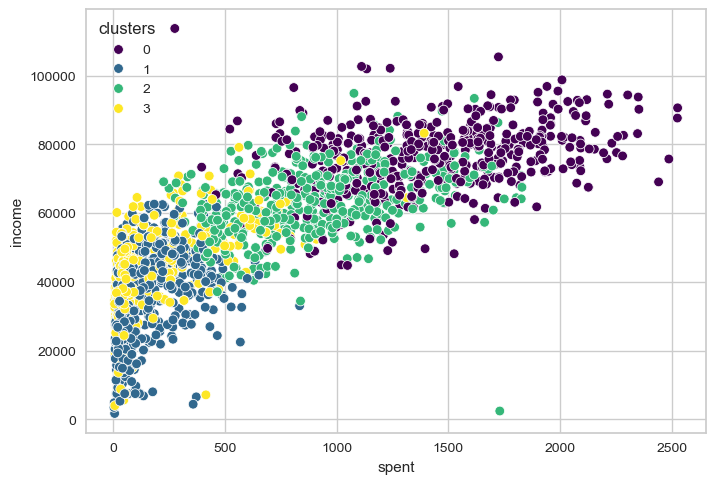

In [1486]:
sns.scatterplot(data=X2, x="spent", y="income", hue="clusters", palette = 'viridis');

# K_means Part2

In [1487]:
df3 = df[['income', 'spent']]
df3

income  spent
0      58138   1617
1      46344     27
2      71613    776
3      26646     53
4      58293    422
...      ...    ...
2200   61223   1341
2201   64014    444
2202   56981   1241
2203   69245    843
2204   52869    172

[2205 rows x 2 columns]

In [1488]:
scaler = StandardScaler()

scaled_df3 = scaler.fit_transform(df3)
scaled_df3

array([[ 0.31465086,  1.67932338],
       [-0.25487741, -0.96389748],
       [ 0.96535404,  0.28124241],
       ...,
       [ 0.25877972,  1.05425983],
       [ 0.85100412,  0.39262341],
       [ 0.06021263, -0.72284904]])

In [1489]:
scaled_X3 = pd.DataFrame(scaled_df3, columns = df3.columns)
scaled_X3.head()

income  spent
0    0.31   1.68
1   -0.25  -0.96
2    0.97   0.28
3   -1.21  -0.92
4    0.32  -0.31

In [1490]:
hopkins(scaled_X3)

0.9325421206488439

In [1491]:
hopkins(scaled_X3, 1)

0.9338863798256835

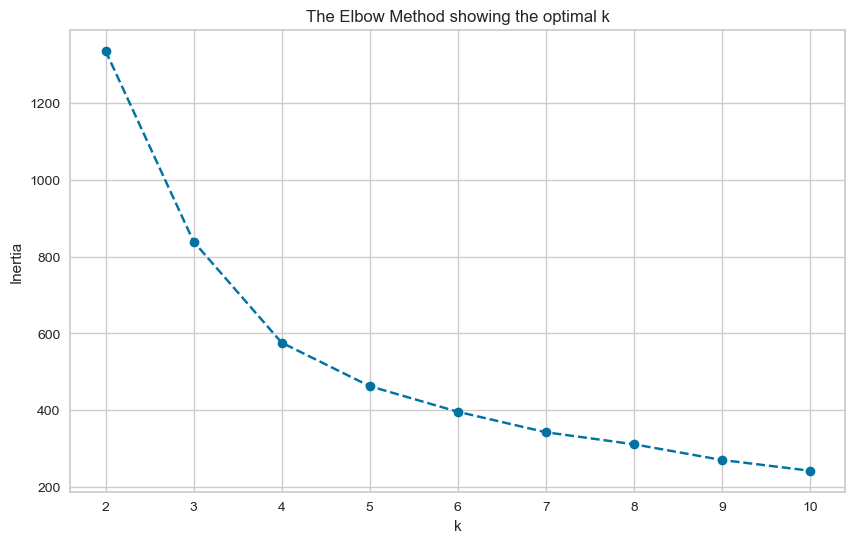

In [1492]:
elbow_vis(scaled_X3)

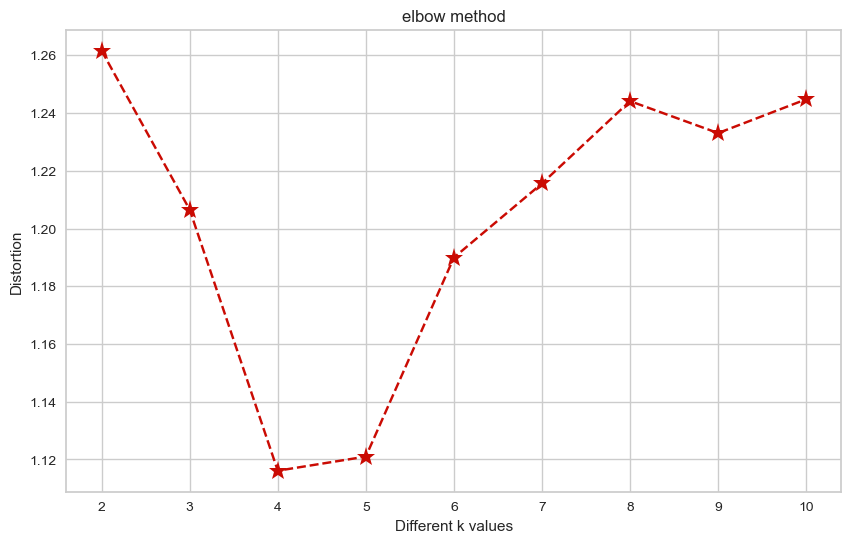

In [1493]:
elbow_vis(scaled_X3, inertia = False)

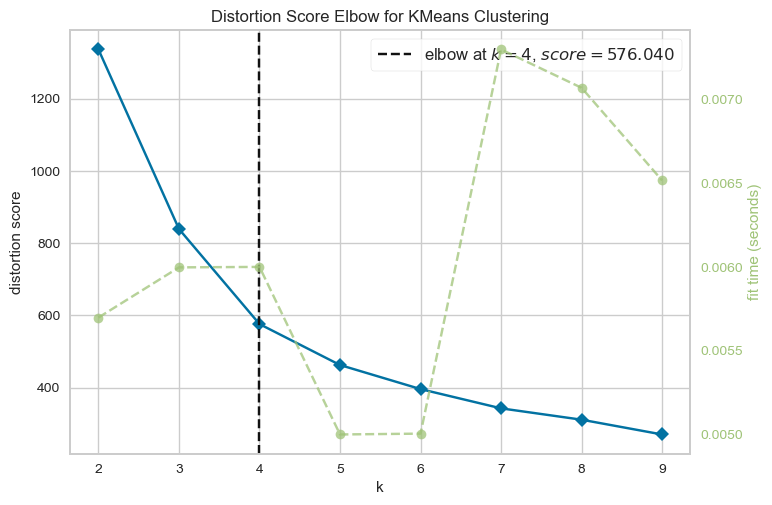

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1494]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(scaled_X3)
visu.poof()

In [1495]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(scaled_X3)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_X3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5918979235749271
For n_clusters=3, the silhouette score is 0.4881831101500017
For n_clusters=4, the silhouette score is 0.44232997977407534
For n_clusters=5, the silhouette score is 0.41059912157474926
For n_clusters=6, the silhouette score is 0.3830308281706518
For n_clusters=7, the silhouette score is 0.38604164914905853
For n_clusters=8, the silhouette score is 0.3828121545012392
For n_clusters=9, the silhouette score is 0.3783877202861647


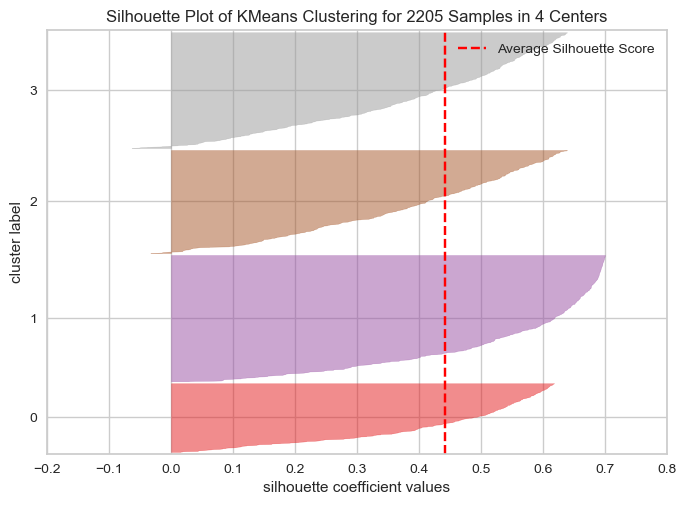

In [1496]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=4!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_X3)    # Fit the data to the visualizer
visualizer.poof();

In [1497]:
K_means_model = KMeans(n_clusters = 4, random_state=42)
y_kmeans = K_means_model.fit_predict(scaled_X3)
y_kmeans

array([0, 3, 2, ..., 2, 2, 3])

In [1498]:
K_means_model.labels_

array([0, 3, 2, ..., 2, 2, 3])

In [1499]:
clusters3 = K_means_model.labels_

In [1500]:
df3['clusters'] = clusters3

In [1501]:
df3

income  spent  clusters
0      58138   1617         0
1      46344     27         3
2      71613    776         2
3      26646     53         1
4      58293    422         3
...      ...    ...       ...
2200   61223   1341         2
2201   64014    444         3
2202   56981   1241         2
2203   69245    843         2
2204   52869    172         3

[2205 rows x 3 columns]

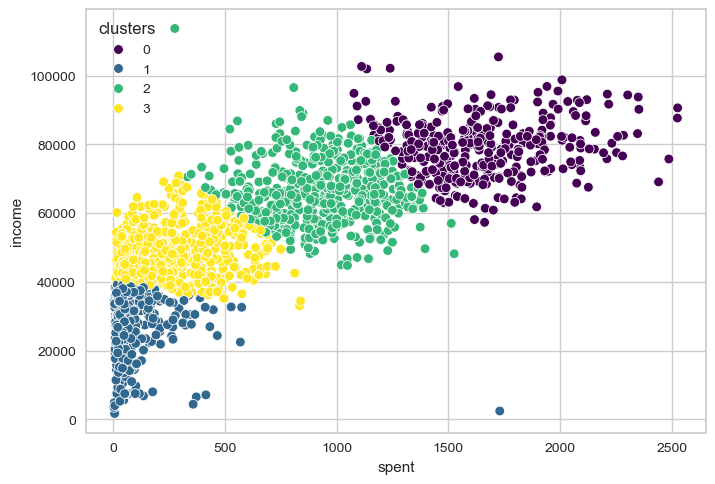

In [1502]:
sns.scatterplot(data=df3, x="spent", y="income", hue="clusters", palette = 'viridis');

In [1503]:
clusters_mapping = {0: 'diamond',
                   1 : 'bronze',
                   2 : 'gold',
                   3 : 'silver'}

In [1504]:
df3.clusters = df3.clusters.map(clusters_mapping)

In [1505]:
df3

income  spent clusters
0      58138   1617  diamond
1      46344     27   silver
2      71613    776     gold
3      26646     53   bronze
4      58293    422   silver
...      ...    ...      ...
2200   61223   1341     gold
2201   64014    444   silver
2202   56981   1241     gold
2203   69245    843     gold
2204   52869    172   silver

[2205 rows x 3 columns]

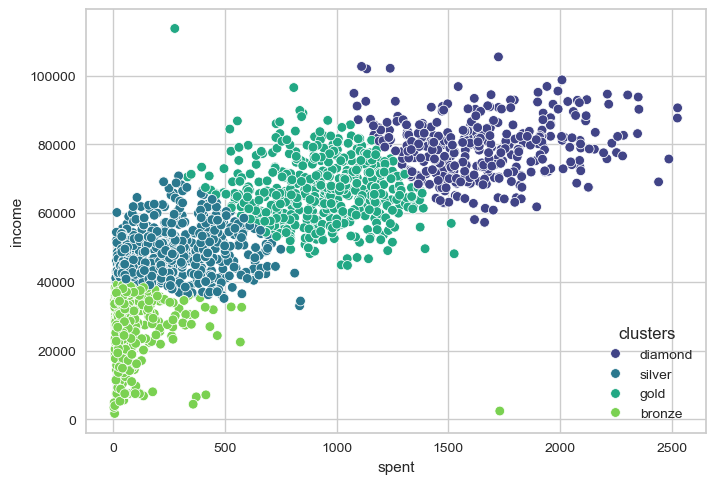

In [1506]:
sns.scatterplot(data=df3, x="spent", y="income", hue="clusters", palette = 'viridis');

In [1507]:

cluster_names = ['diamond', 'silver', 'gold', 'bronze']

cluster_means = []

# Her küme için ortalama 'income' ve 'spent' değerlerini hesapla
for cluster in cluster_names:
    cluster_data = df3[df3['clusters'] == cluster][['income', 'spent']].mean()
    cluster_means.append({
        'clusters': cluster,
        'income_mean': cluster_data['income'],
        'spent_mean': cluster_data['spent']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df.sort_values(by = 'income_mean')

clusters  income_mean  spent_mean
3   bronze    27,321.27       76.44
1   silver    48,593.02      275.79
2     gold    66,460.83      937.09
0  diamond    79,154.70    1,644.73

In [1508]:
cluster_means = df3.groupby('clusters')['income'].mean()
cluster_means

clusters
bronze    27,321.27
diamond   79,154.70
gold      66,460.83
silver    48,593.02
Name: income, dtype: float64

In [1509]:
def classify_income(row):
    return cluster_means[row['clusters']]

In [1510]:
df3['income_class'] = df3.apply(classify_income, axis=1)

print(df3)

      income  spent clusters  income_class
0      58138   1617  diamond     79,154.70
1      46344     27   silver     48,593.02
2      71613    776     gold     66,460.83
3      26646     53   bronze     27,321.27
4      58293    422   silver     48,593.02
...      ...    ...      ...           ...
2200   61223   1341     gold     66,460.83
2201   64014    444   silver     48,593.02
2202   56981   1241     gold     66,460.83
2203   69245    843     gold     66,460.83
2204   52869    172   silver     48,593.02

[2205 rows x 4 columns]


In [1511]:
df3['income_class'] = pd.cut(df3['income_class'], bins=4, labels=['high_income', 'medium_high_income', 'medium_low_income', 'low_income'])

In [1512]:
df3

income  spent clusters        income_class
0      58138   1617  diamond          low_income
1      46344     27   silver  medium_high_income
2      71613    776     gold          low_income
3      26646     53   bronze         high_income
4      58293    422   silver  medium_high_income
...      ...    ...      ...                 ...
2200   61223   1341     gold          low_income
2201   64014    444   silver  medium_high_income
2202   56981   1241     gold          low_income
2203   69245    843     gold          low_income
2204   52869    172   silver  medium_high_income

[2205 rows x 4 columns]

In [1513]:
df.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products',
       'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods',
       'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases',
       'num_store_purchases', 'num_web_visits_month', 'age',
       'days_registration', 'spent', 'children', 'total_accepted',
       'predicted_clusters'],
      dtype='object')

In [1514]:
df.drop('predicted_clusters', axis = 1, inplace = True)

In [1515]:
df[['clusters', 'income_class']] = df3[['clusters', 'income_class']]

In [1516]:
df.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products',
       'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods',
       'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases',
       'num_store_purchases', 'num_web_visits_month', 'age',
       'days_registration', 'spent', 'children', 'total_accepted', 'clusters',
       'income_class'],
      dtype='object')

In [1519]:
def cluster(feature):
    
    _, axes = plt.subplots(figsize=(20,8))
    sns.kdeplot(x=df[feature], y=df["spent"], hue =df["clusters"], kind="kde",height=10, palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])
    axes.set_title(f"\nClustering Profile On {feature}\n",fontsize=25)
    axes.set_ylabel("Spending",fontsize=20)
    axes.set_xlabel(f"\n{feature}",fontsize=20)
    
    sns.despine(left=True, bottom=True)
    plt.show()

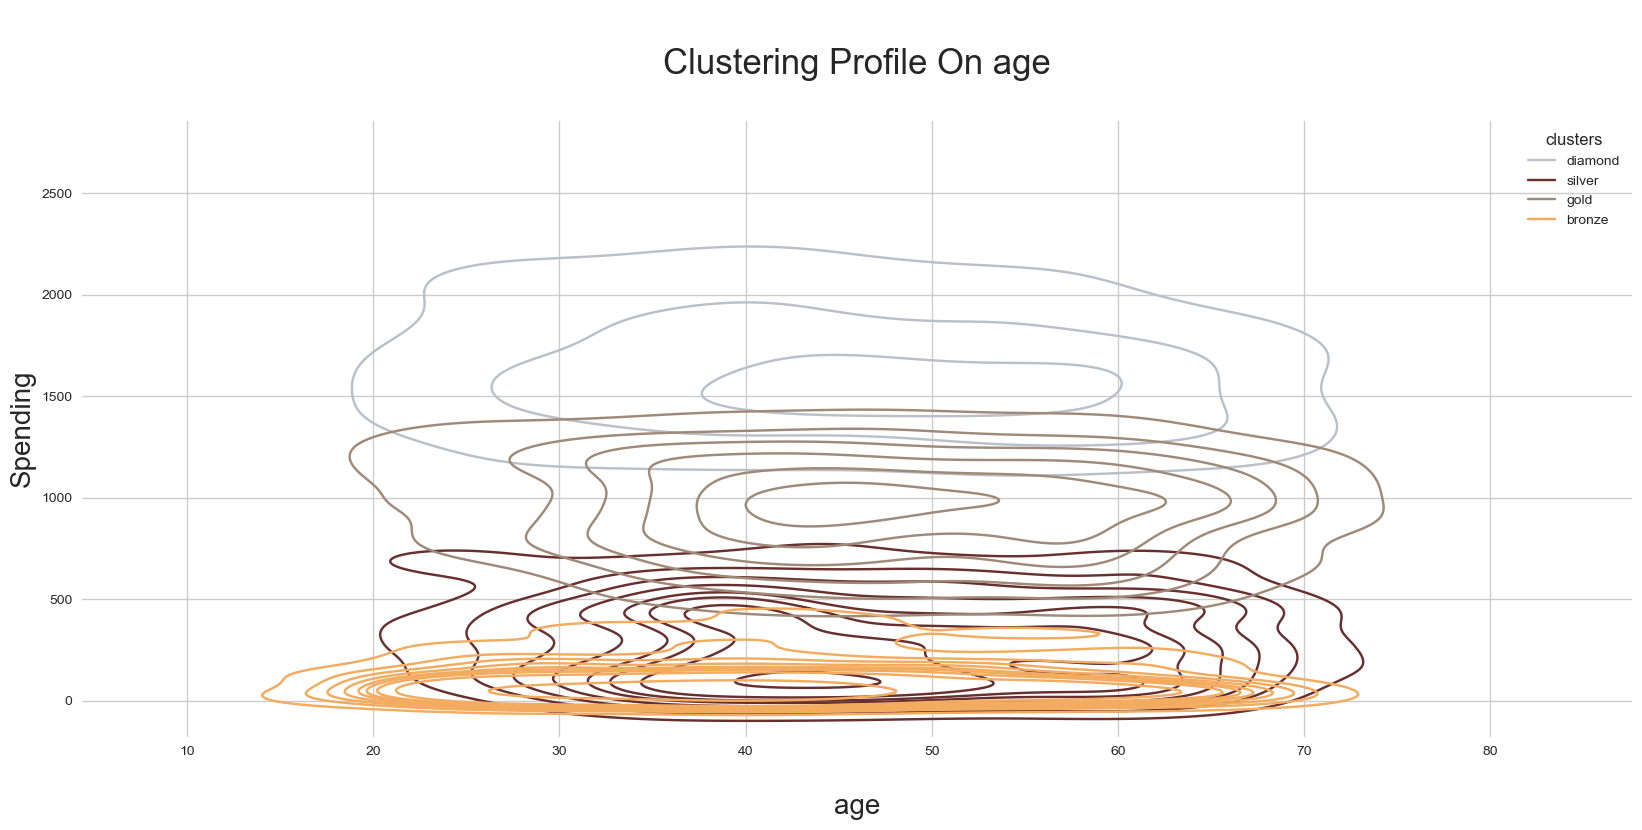

In [1520]:
cluster('age')

# cluster = bronze

In [1528]:
print(df[df['clusters'] == 'bronze'][[ 'age']].max())

print(df[df['clusters'] == 'bronze'][[ 'age']].min())

age    68
dtype: int64
age    18
dtype: int64


In [1538]:
df[df['clusters'] == 'bronze'][ 'education'].value_counts(normalize = True)


education
lower_edu_level    0.58
medium_edu_level   0.26
high_edu_level     0.16
Name: proportion, dtype: float64

In [1543]:
df[df['clusters'] == 'bronze'][['marital_status', 'children']].value_counts(normalize = True)


marital_status  children
Relationship    1          0.39
Single          1          0.20
Relationship    2          0.16
                0          0.09
Single          2          0.07
                0          0.06
Relationship    3          0.02
Single          3          0.01
Name: proportion, dtype: float64

In [1545]:
print(df[df['clusters'] == 'bronze'][ 'spent'].max())

print(df[df['clusters'] == 'bronze'][ 'spent'].min())


1730
5


In [1546]:
df[df['clusters'] == 'bronze'][['total_accepted']].value_counts(normalize = True)


total_accepted
0                0.92
1                0.08
Name: proportion, dtype: float64

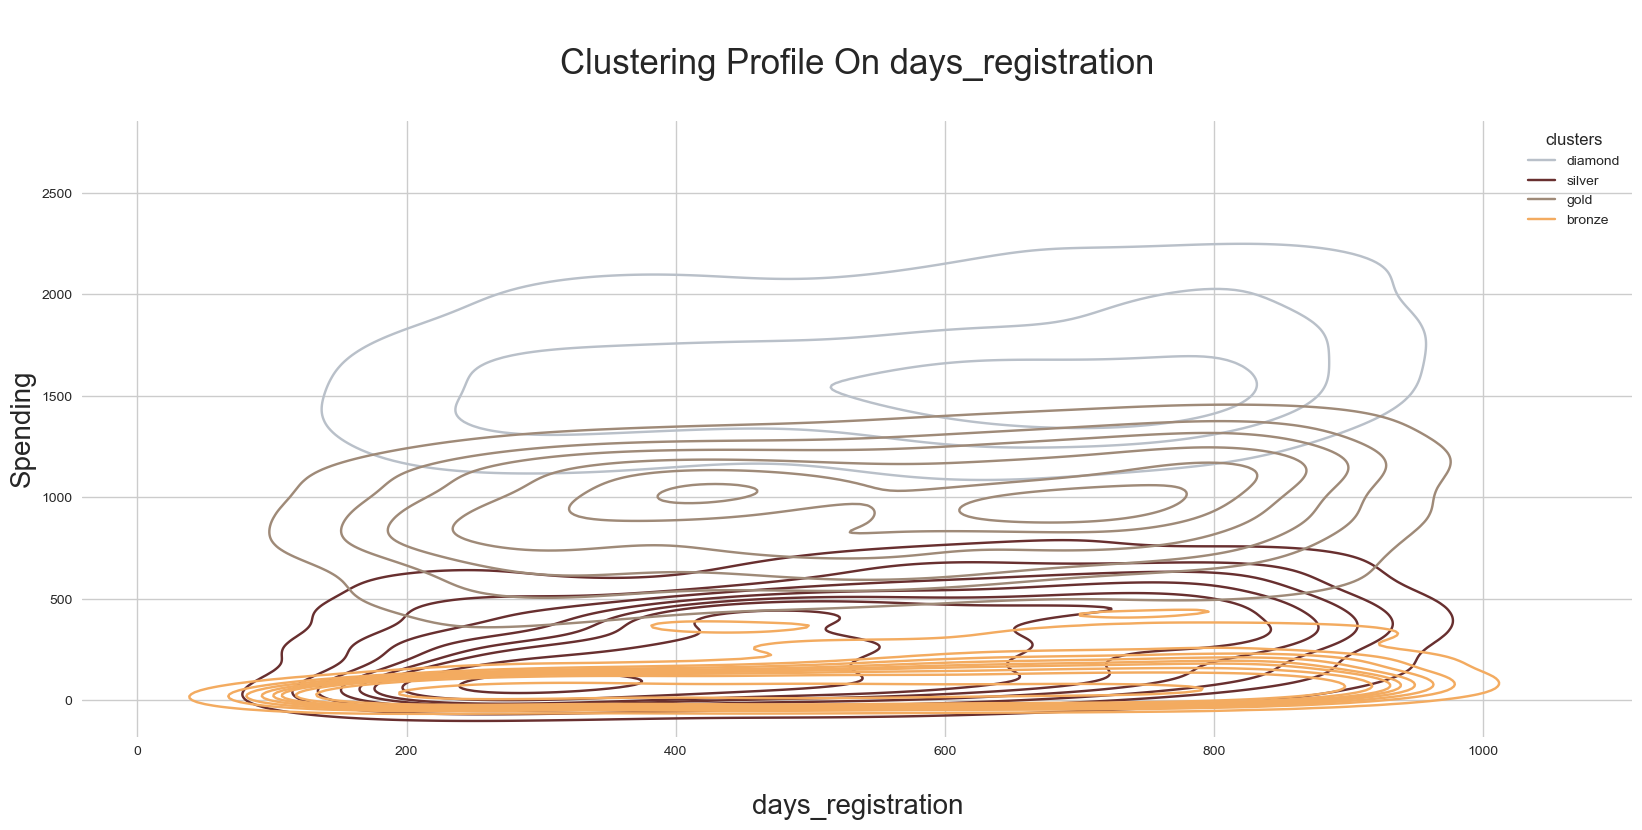

In [1548]:
cluster('days_registration')


In [1549]:
print(df[df['clusters'] == 'bronze'][ 'days_registration'].max())

print(df[df['clusters'] == 'bronze'][ 'days_registration'].min())

882
185


In [1550]:
df[df['clusters'] == 'bronze'][['num_deals_purchases']].value_counts(normalize = True)

num_deals_purchases
1                     0.44
2                     0.27
3                     0.16
4                     0.08
5                     0.02
0                     0.01
7                     0.01
15                    0.01
6                     0.00
Name: proportion, dtype: float64

In [1578]:
print(df[df['clusters'] == 'bronze'][ 'income'].max())

print(df[df['clusters'] == 'bronze'][ 'income'].min())

39356.0
1730.0


RESULT = 


Bu grubta bulunanlarin en kucugu 18 yasinda en buyugu 68 yasinda.
En az bir indirimli alisveris yapanlarin orani %44.
En az üyelik gün sayisi 185, en cok 882.
%92 si yapilan kampanyalara katilmamis.
En cok alisveris yapanlar %39 la tek cocuklu aileler.
En az $5 , en cok $1730 harcanmis.
Her egitim seviyesinden bireyler bulunuyor, fakat %58 i düsük egitim seviyesinden.
Bu gruptaki yillik en düsük gelir $1730 ve en yüksek gelir $39356 dir.

# Cluster = silver

In [1552]:
print(df[df['clusters'] == 'silver'][[ 'age']].max())

print(df[df['clusters'] == 'silver'][[ 'age']].min())

age    74
dtype: int64
age    22
dtype: int64


In [1553]:
df[df['clusters'] == 'silver'][ 'education'].value_counts(normalize = True)


education
lower_edu_level    0.49
medium_edu_level   0.27
high_edu_level     0.24
Name: proportion, dtype: float64

In [1554]:
df[df['clusters'] == 'silver'][['marital_status', 'children']].value_counts(normalize = True)


marital_status  children
Relationship    1          0.36
                2          0.21
Single          1          0.18
                2          0.12
Relationship    0          0.05
Single          0          0.03
Relationship    3          0.02
Single          3          0.02
Name: proportion, dtype: float64

In [1559]:
print(df[df['clusters'] == 'silver'][ 'spent'].max())

print(df[df['clusters'] == 'silver'][ 'spent'].min())

839
13


In [1556]:
df[df['clusters'] == 'silver'][['total_accepted']].value_counts(normalize = True)


total_accepted
0                0.88
1                0.11
2                0.01
Name: proportion, dtype: float64

In [1557]:
print(df[df['clusters'] == 'silver'][ 'days_registration'].max())

print(df[df['clusters'] == 'silver'][ 'days_registration'].min())

884
187


In [1558]:
df[df['clusters'] == 'silver'][['num_deals_purchases']].value_counts(normalize = True)

num_deals_purchases
1                     0.29
2                     0.26
3                     0.14
4                     0.10
5                     0.08
6                     0.07
7                     0.03
8                     0.01
9                     0.01
10                    0.00
Name: proportion, dtype: float64

In [1577]:
print(df[df['clusters'] == 'silver'][ 'income'].max())

print(df[df['clusters'] == 'silver'][ 'income'].min())

70844.0
33051.0


In [ ]:
RESULT

Bu grubta bulunanlarin en kucugu 22 yasinda en buyugu 74 yasinda.
En az bir indirimli alisveris yapanlarin orani %29.
En az üyelik gün sayisi 187, en cok 884.
%88 si yapilan kampanyalara katilmamis.
En cok alisveris yapanlar %36 la tek cocuklu aileler.
En az $13 , en cok $839 harcanmis.
Her egitim seviyesinden bireyler bulunuyor, fakat %49 u düsük egitim seviyesinden.
Bu gruptaki yillik en düsük gelir $33051.0 ve en yüksek gelir $70844.0 dir.

# cluster = gold

In [1561]:
print(df[df['clusters'] == 'gold'][[ 'age']].max())

print(df[df['clusters'] == 'gold'][[ 'age']].min())

age    71
dtype: int64
age    19
dtype: int64


In [1562]:
df[df['clusters'] == 'gold'][ 'education'].value_counts(normalize = True)


education
lower_edu_level    0.51
medium_edu_level   0.25
high_edu_level     0.24
Name: proportion, dtype: float64

In [1563]:
df[df['clusters'] == 'gold'][['marital_status', 'children']].value_counts(normalize = True)


marital_status  children
Relationship    1          0.37
                0          0.21
Single          1          0.19
                0          0.14
Relationship    2          0.07
Single          2          0.02
Relationship    3          0.00
Name: proportion, dtype: float64

In [1564]:
print(df[df['clusters'] == 'gold'][ 'spent'].max())

print(df[df['clusters'] == 'gold'][ 'spent'].min())

1526
277


In [1565]:
df[df['clusters'] == 'gold'][['total_accepted']].value_counts(normalize = True)


total_accepted
0                0.77
1                0.18
2                0.03
3                0.01
4                0.00
Name: proportion, dtype: float64

In [1566]:
print(df[df['clusters'] == 'gold'][ 'days_registration'].max())

print(df[df['clusters'] == 'gold'][ 'days_registration'].min())

883
185


In [1567]:
df[df['clusters'] == 'gold'][['num_deals_purchases']].value_counts(normalize = True)

num_deals_purchases
1                     0.39
2                     0.22
3                     0.14
4                     0.11
5                     0.05
7                     0.02
6                     0.02
0                     0.01
8                     0.01
11                    0.01
12                    0.01
13                    0.01
10                    0.00
9                     0.00
15                    0.00
Name: proportion, dtype: float64

In [1576]:
print(df[df['clusters'] == 'gold'][ 'income'].max())

print(df[df['clusters'] == 'gold'][ 'income'].min())

113734.0
44802.0


In [ ]:
RESULT 

Bu grubta bulunanlarin en kucugu 19 yasinda en buyugu 71 yasinda.
En az bir indirimli alisveris yapanlarin orani %39.
En az üyelik gün sayisi 185, en cok 883.
%77 si yapilan kampanyalara katilmamis.
En cok alisveris yapanlar %37 si tek cocuklu aileler.
En az $277 , en cok $1526 harcanmis.
Her egitim seviyesinden bireyler bulunuyor, fakat %51 u düsük egitim seviyesinden.
Bu gruptaki yillik en düsük gelir $44802.0.0 ve en yüksek gelir $113734.0.0 dir.

# cluster = diamond

In [1568]:
print(df[df['clusters'] == 'diamond'][[ 'age']].max())

print(df[df['clusters'] == 'diamond'][[ 'age']].min())

age    73
dtype: int64
age    19
dtype: int64


In [1569]:
df[df['clusters'] == 'diamond'][ 'education'].value_counts(normalize = True)


education
lower_edu_level    0.53
high_edu_level     0.25
medium_edu_level   0.22
Name: proportion, dtype: float64

In [1570]:
df[df['clusters'] == 'diamond'][['marital_status', 'children']].value_counts(normalize = True)


marital_status  children
Relationship    0          0.46
Single          0          0.31
Relationship    1          0.14
Single          1          0.06
                2          0.02
Relationship    2          0.01
                3          0.01
Single          3          0.00
Name: proportion, dtype: float64

In [1571]:
print(df[df['clusters'] == 'diamond'][ 'spent'].max())

print(df[df['clusters'] == 'diamond'][ 'spent'].min())

2525
1078


In [1572]:
df[df['clusters'] == 'diamond'][['total_accepted']].value_counts(normalize = True)


total_accepted
0                0.44
1                0.27
2                0.16
3                0.10
4                0.02
Name: proportion, dtype: float64

In [1573]:
print(df[df['clusters'] == 'diamond'][ 'days_registration'].max())

print(df[df['clusters'] == 'diamond'][ 'days_registration'].min())

882
188


In [1574]:
df[df['clusters'] == 'diamond'][['num_deals_purchases']].value_counts(normalize = True)

num_deals_purchases
1                     0.73
2                     0.08
0                     0.07
3                     0.06
4                     0.02
5                     0.01
6                     0.01
7                     0.01
8                     0.00
9                     0.00
10                    0.00
11                    0.00
Name: proportion, dtype: float64

In [1575]:
print(df[df['clusters'] == 'diamond'][ 'income'].max())

print(df[df['clusters'] == 'diamond'][ 'income'].min())

105471.0
57333.0


In [ ]:
RESULT 

Bu grubta bulunanlarin en kucugu 19 yasinda en buyugu 73 yasinda.
En az bir indirimli alisveris yapanlarin orani %73.
En az üyelik gün sayisi 188, en cok 882.
%44 si yapilan kampanyalara katilmamis.
En cok alisveris yapanlar %46 si cocuksuz aileler.
En az $1078 , en cok $2525 harcanmis.
Her egitim seviyesinden bireyler bulunuyor, fakat %51 u düsük egitim seviyesinden.
Bu gruptaki yillik en dusuk gelir $57333.0 ve en yüksek gelir $105471.0

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

In [1226]:
df1 = pd.DataFrame(numerical_features, columns = numerical_features.columns)

In [1227]:
HC = df1.copy()
HC.head()

income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0   58138        0         0       58        635          88   
1   46344        1         1       38         11           1   
2   71613        0         0       26        426          49   
3   26646        1         0       26         11           4   
4   58293        1         0       94        173          43   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0                546                172                  88              88   
1                  6                  2                   1               6   
2                127                111                  21              42   
3                 20                 10                   3               5   
4                118                 46                  27              15   

   num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                    3                  8                     10   
1                    2                  1                      1   
2                    1                  8                      2   
3                    2                  2                      0   
4                    5                  5                      3   

   num_store_purchases  num_web_visits_month  age  days_registration  spent  \
0                    4                     7   57                848   1617   
1                    2                     5   60                298     27   
2                   10                     4   49                497    776   
3                    4                     6   30                324     53   
4                    6                     5   33                346    422   

   children  total_accepted  
0         0               0  
1         2               0  
2         0               0  
3         1               0  
4         1               0

In [1228]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [1229]:
scaler = StandardScaler()
scaled_HC = scaler.fit_transform(HC)

In [1230]:
scaled_HC

array([[ 0.31465086, -0.82340514, -0.93076676, ...,  1.67932338,
        -1.26658936, -0.4399912 ],
       [-0.25487741,  1.03875725,  0.90660182, ..., -0.96389748,
         1.40341976, -0.4399912 ],
       [ 0.96535404, -0.82340514, -0.93076676, ...,  0.28124241,
        -1.26658936, -0.4399912 ],
       ...,
       [ 0.25877972, -0.82340514, -0.93076676, ...,  1.05425983,
        -1.26658936,  1.0299794 ],
       [ 0.85100412, -0.82340514,  0.90660182, ...,  0.39262341,
         0.0684152 , -0.4399912 ],
       [ 0.06021263,  1.03875725,  0.90660182, ..., -0.72284904,
         1.40341976, -0.4399912 ]])

In [1231]:
X_1 = pd.DataFrame(scaled_HC, columns = HC.columns )
X_1.shape

(2205, 20)

In [1232]:
hopkins(X_1)

0.8460384898859724

In [1233]:
hopkins(X_1, 1)

0.8496631632351603

# Dendogram

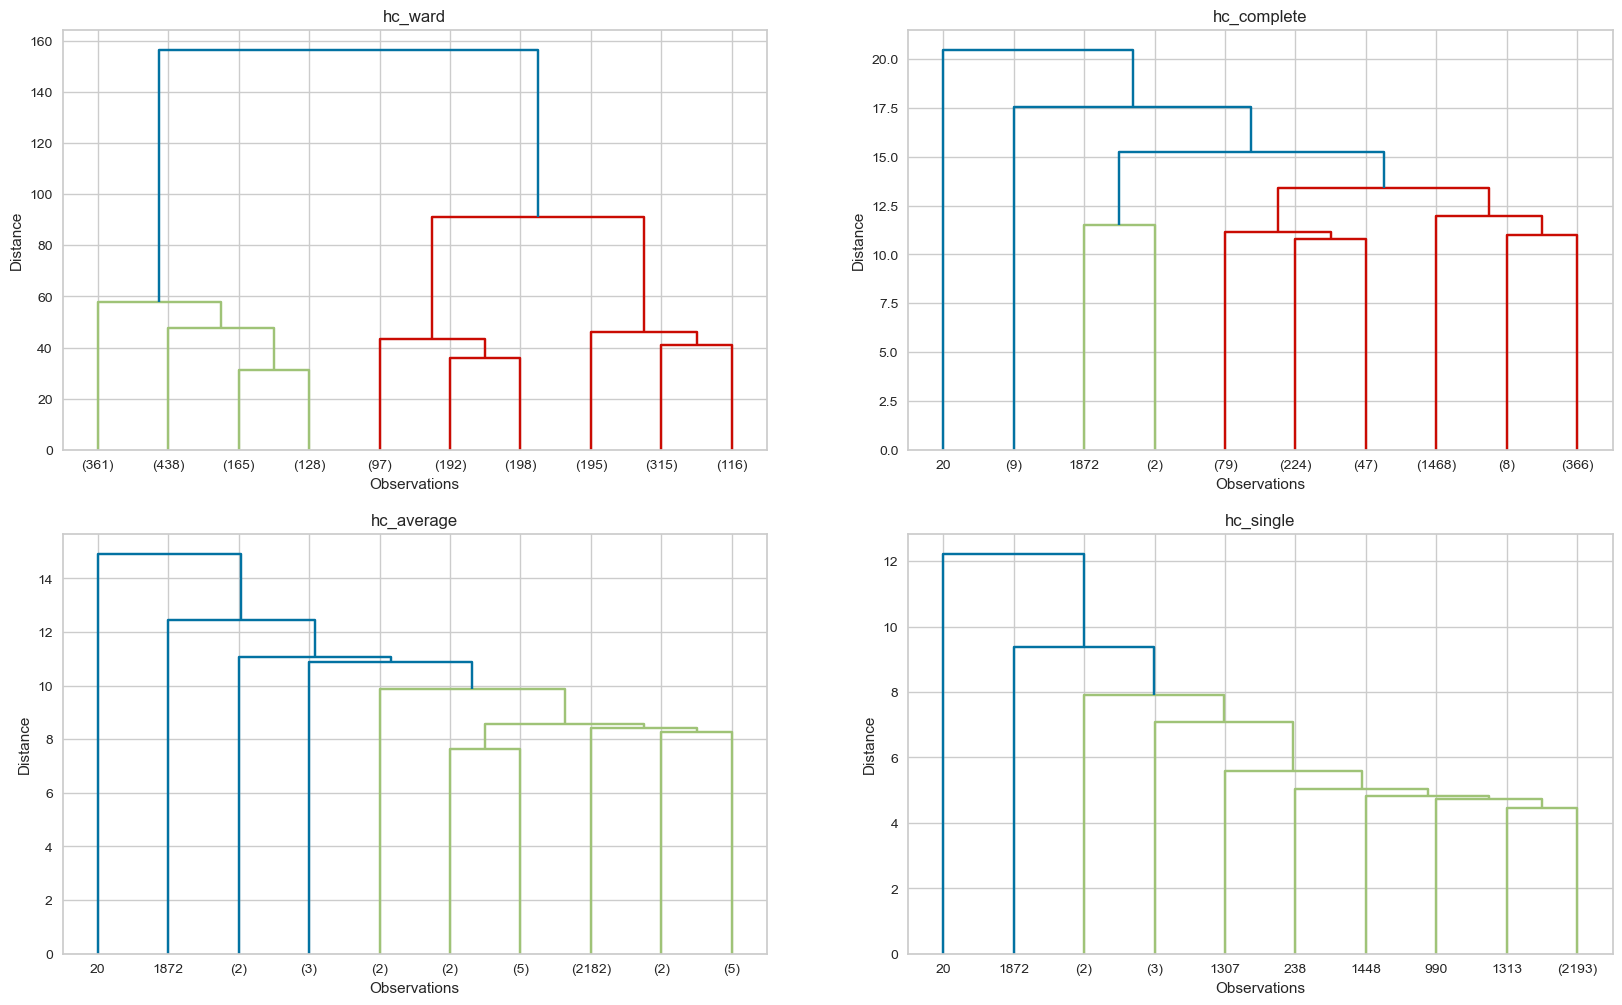

In [1234]:
linkage_dict = {"hc_ward": linkage(y=X_1, method="ward"),
                "hc_complete": linkage(X_1, "complete"),
                "hc_average": linkage(X_1, "average"),
                "hc_single": linkage(X_1, "single")}


plot_list = list(range(221, 225))

plt.figure(figsize=(20, 12))

for _plot, (title, method) in zip(plot_list, linkage_dict.items()):
    plt.subplot(_plot)
    plt.title(title)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(method, truncate_mode="lastp", p=10, leaf_font_size=10)

### silhouette_score

In [1235]:
from sklearn.metrics import silhouette_score

In [1236]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X_1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_1, model.labels_)}')

# In n_clusters=2 the silhouette score is high but;
# If I choose the number of clusters as 2, one of the clusters will spread over a very large area
# according to the scatterplot.
# So we are thinking if we can choose n_clusters=3. In the ward dendogram ,
# We choose 3 because we see that the minimum inter-cluster distance is at the maximum level within 3 clusters.
# the silhouette score calculated here is the average of all observations (according to clusters)

Silhouette Score for 2 clusters: 0.2571310753644142
Silhouette Score for 3 clusters: 0.22884536687375928
Silhouette Score for 4 clusters: 0.1366749382352122
Silhouette Score for 5 clusters: 0.13769282058313323
Silhouette Score for 6 clusters: 0.12539179600923187
Silhouette Score for 7 clusters: 0.12814055833466118
Silhouette Score for 8 clusters: 0.1359439585527702
Silhouette Score for 9 clusters: 0.13322243772585055


In [1237]:
model = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X_1)
clusters

array([1, 3, 2, ..., 2, 1, 3], dtype=int64)

In [1238]:
X_1['clusters'] = clusters

In [1239]:
X_1.head().T

0     1     2     3     4
income                 0.31 -0.25  0.97 -1.21  0.32
kidhome               -0.82  1.04 -0.82  1.04  1.04
teenhome              -0.93  0.91 -0.93 -0.93 -0.93
recency                0.31 -0.38 -0.80 -0.80  1.56
mnt_wines              0.97 -0.87  0.36 -0.87 -0.39
mnt_fruits             1.55 -0.64  0.57 -0.56  0.42
mnt_meat_products      1.75 -0.73 -0.18 -0.67 -0.22
mnt_fish_products      2.45 -0.65  1.34 -0.51  0.15
mnt_sweet_products     1.48 -0.64 -0.15 -0.59 -0.00
mnt_gold_prods         0.85 -0.74 -0.04 -0.76 -0.56
num_deals_purchases    0.36 -0.17 -0.70 -0.17  1.42
num_web_purchases      1.42 -1.13  1.42 -0.77  0.33
num_catalog_purchases  2.63 -0.59 -0.23 -0.95  0.13
num_store_purchases   -0.56 -1.18  1.29 -0.56  0.05
num_web_visits_month   0.69 -0.14 -0.55  0.27 -0.14
age                    1.02  1.27  0.33 -1.29 -1.03
days_registration      1.53 -1.19 -0.21 -1.06 -0.95
spent                  1.68 -0.96  0.28 -0.92 -0.31
children              -1.27  1.40 -1.27  0.07  0.07
total_accepted        -0.44 -0.44 -0.44 -0.44 -0.44
clusters                  1     3     2     0     1

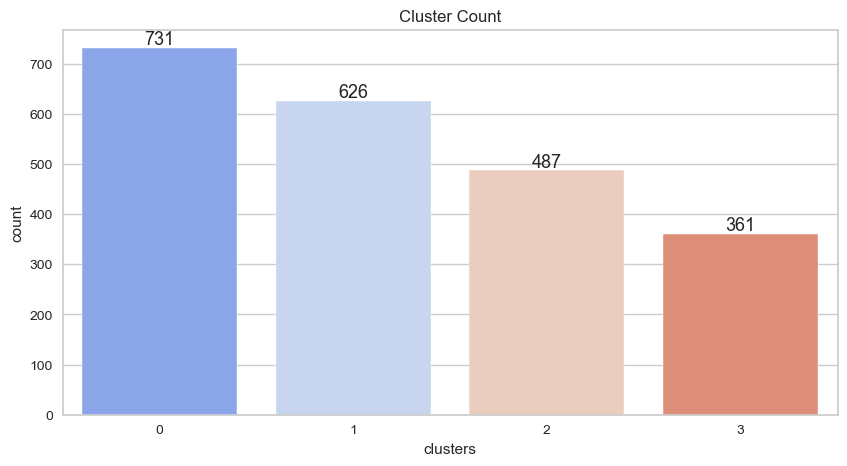

In [1240]:
plt.figure(figsize=(10, 5))
plt.title("Cluster Count")
ax = sns.countplot(x=X_1.clusters, palette="coolwarm")
# ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=13, xytext=(0, 6),
                textcoords='offset points')
plt.show()

In [1243]:
HC['clusters'] = clusters

<Axes: xlabel='spent', ylabel='income'>

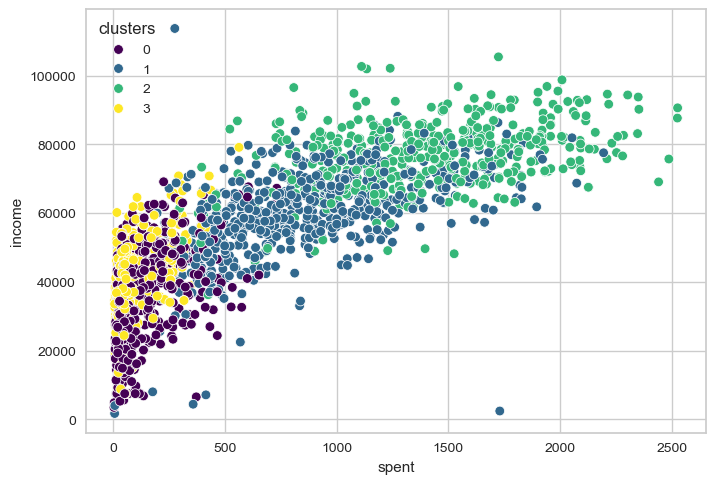

In [1247]:
sns.scatterplot(HC, x = 'spent', y= 'income', hue = 'clusters', palette = 'viridis')

In [1248]:
clusters_mapping = {0: 'bronze',
                   1 : 'gold',
                   2 : 'diamond',
                   3 : 'silver'}

In [1249]:
HC.clusters = HC.clusters.map(clusters_mapping)

In [1250]:

cluster_names = ['diamond', 'silver', 'gold', 'bronze']

cluster_means = []

# Her küme için ortalama 'income' ve 'spent' değerlerini hesapla
for cluster in cluster_names:
    cluster_data = HC[HC['clusters'] == cluster][['income', 'spent']].mean()
    cluster_means.append({
        'clusters': cluster,
        'income_mean': cluster_data['income'],
        'spent_mean': cluster_data['spent']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df.sort_values(by = 'income_mean')

clusters  income_mean  spent_mean
3   bronze    33,277.31      124.25
1   silver    40,600.11      108.34
2     gold    60,019.85      850.03
0  diamond    76,533.75    1,388.07

In [1253]:
cluster_means = HC.groupby('clusters')['income'].mean()
cluster_means

clusters
bronze    33,277.31
diamond   76,533.75
gold      60,019.85
silver    40,600.11
Name: income, dtype: float64

In [1254]:
def classify_income(row):
    return cluster_means[row['clusters']]

In [1255]:
HC['income_class'] = HC.apply(classify_income, axis=1)

print(HC)

      income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0      58138        0         0       58        635          88   
1      46344        1         1       38         11           1   
2      71613        0         0       26        426          49   
3      26646        1         0       26         11           4   
4      58293        1         0       94        173          43   
...      ...      ...       ...      ...        ...         ...   
2200   61223        0         1       46        709          43   
2201   64014        2         1       56        406           0   
2202   56981        0         0       91        908          48   
2203   69245        0         1        8        428          30   
2204   52869        1         1       40         84           3   

      mnt_meat_products  mnt_fish_products  mnt_sweet_products  \
0                   546                172                  88   
1                     6                  2                   1 

In [1256]:
HC['income_class'] = pd.cut(HC['income_class'], bins=4, labels=['high_income', 'medium_high_income', 'medium_low_income', 'low_income'])

In [1258]:
pd.crosstab(HC.income_class, HC.clusters) 

clusters           bronze  diamond  gold  silver
income_class                                    
high_income           731        0     0     361
medium_low_income       0        0   626       0
low_income              0      487     0       0

### Clustering based on selected features

In [1259]:
HC1 = HC[['income', 'spent']]

In [1266]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(HC1)
scaled_X

array([[ 0.31465086,  1.67932338],
       [-0.25487741, -0.96389748],
       [ 0.96535404,  0.28124241],
       ...,
       [ 0.25877972,  1.05425983],
       [ 0.85100412,  0.39262341],
       [ 0.06021263, -0.72284904]])

In [1267]:
X_2 = pd.DataFrame(scaled_X, columns = HC1.columns )
X_2.shape

(2205, 2)

In [1268]:
hopkins(X_2)

0.9278028267495417

In [1269]:
hopkins(X_2, 1)

0.93341527500408

In [1270]:
hc_ward1 = linkage(X_1, method = 'ward')
hc_ward1

array([[1.29000000e+03, 1.45100000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.42000000e+02, 1.59700000e+03, 0.00000000e+00, 2.00000000e+00],
       [8.95000000e+02, 1.87900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.39400000e+03, 4.40500000e+03, 8.77638774e+01, 1.09200000e+03],
       [4.40300000e+03, 4.40400000e+03, 9.40690325e+01, 1.11300000e+03],
       [4.40600000e+03, 4.40700000e+03, 1.57240007e+02, 2.20500000e+03]])

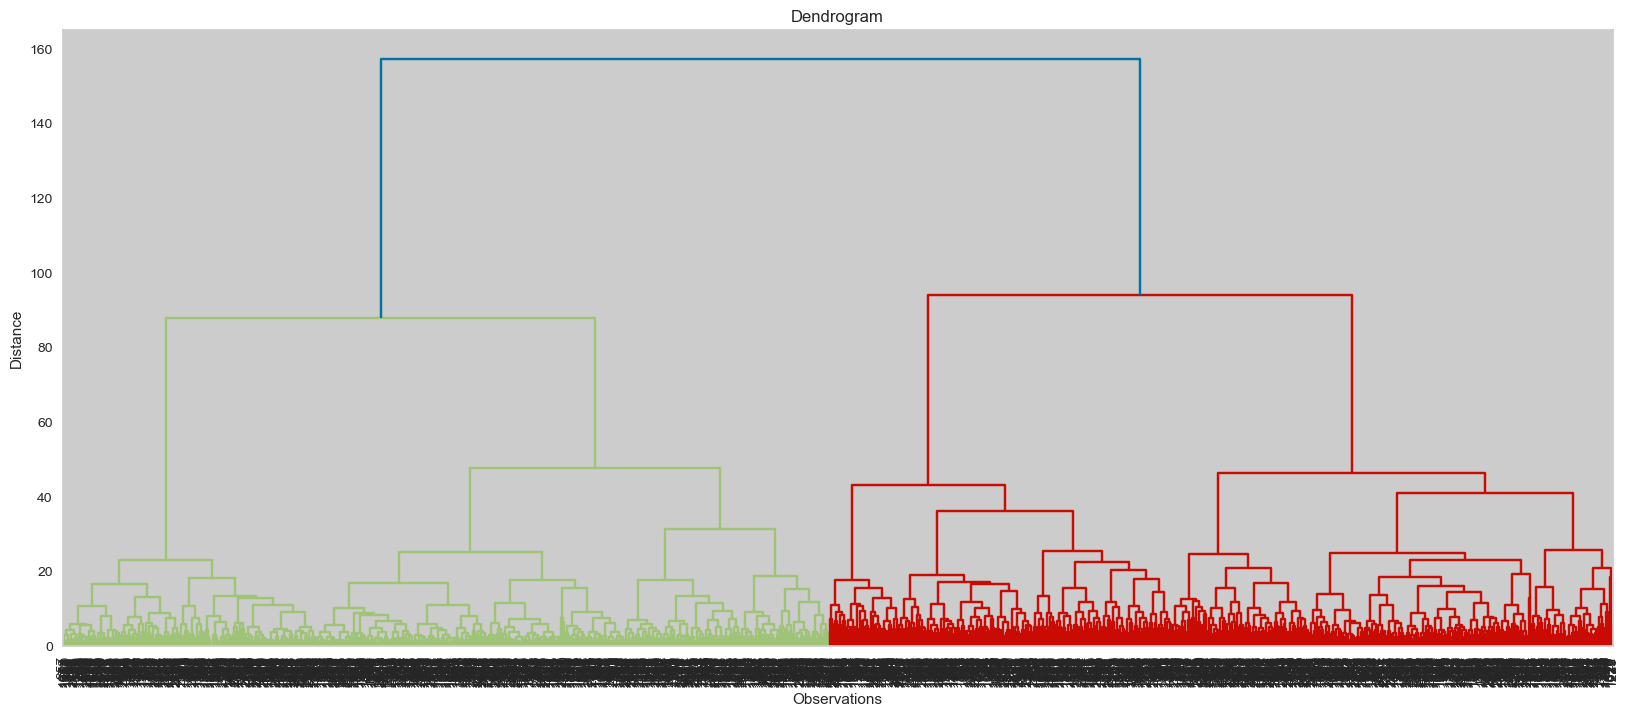

In [1271]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward1, leaf_font_size = 10);

In [1272]:
from sklearn.cluster import AgglomerativeClustering

In [1273]:
model = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")

In [1274]:
model.fit_predict(X_2)

array([2, 1, 0, ..., 0, 0, 1], dtype=int64)

In [1275]:
model.labels_

array([2, 1, 0, ..., 0, 0, 1], dtype=int64)

In [1276]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.60319726277469
Silhouette Score for 3 clusters: 0.5382123791648534
Silhouette Score for 4 clusters: 0.47405668399922213
Silhouette Score for 5 clusters: 0.5108064259573932
Silhouette Score for 6 clusters: 0.5112906454762283
Silhouette Score for 7 clusters: 0.5041085557396879
Silhouette Score for 8 clusters: 0.5084054968698414
Silhouette Score for 9 clusters: 0.49367642417127855


In [1277]:
model = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X_2)

In [1278]:
X_2['clusters'] = clusters

In [1279]:
X_2.head().T

0     1    2     3     4
income   0.31 -0.25 0.97 -1.21  0.32
spent    1.68 -0.96 0.28 -0.92 -0.31
clusters    2     1    0     3     0

## Conclusion

In [ ]:
Cluster sayisini 4 olarak tespit ettik. En iyi sonucu K_mean te part 2 kisminda aldik. Silhouette score bu kisimda %43 civari

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___